# Training Pipelines

### Setup

In [1]:
import pandas as pd
from train_pipeline import train_model

def print_nested_keys(d, prefix=''):
    if isinstance(d, dict):
        for key in d:
            full_key = f"{prefix}.{key}" if prefix else key
            print(full_key)
            print_nested_keys(d[key], full_key)

def print_nested_keys_and_values(d, prefix=''):
    if isinstance(d, dict):
        for key, value in d.items():
            full_key = f"{prefix}.{key}" if prefix else key
            print_nested_keys_and_values(value, full_key)
    elif isinstance(d, list):
        for idx, item in enumerate(d):
            full_key = f"{prefix}[{idx}]"
            print_nested_keys_and_values(item, full_key)
    else:
        print(f"{prefix}:\n{d}\n")

def print_nested_keys_and_values(d, prefix='', filter_key=None):
    if isinstance(d, dict):
        for key, value in d.items():
            full_key = f"{prefix}.{key}" if prefix else key
            print_nested_keys_and_values(value, full_key, filter_key)
    elif isinstance(d, list):
        for idx, item in enumerate(d):
            full_key = f"{prefix}[{idx}]"
            print_nested_keys_and_values(item, full_key, filter_key)
    else:
        if filter_key is None or prefix.endswith(filter_key):
            print(f"{prefix}:\n{d}\n")


In [2]:
feats_name = "reduced_feats"
shap_opt = 0
model_names =  [
    "catb_native",
    "catb_onehot[selected]",
    "catb_onehot_impute",
    "xgb_onehot", "xgb_impute",
    "lr", "lr_solidloading",
    "rf"
                ]
results = {}
# Metrics configurations
FEATURES_TO_ANALYZE = ["material_group", "name_part1", "name_fluid1", "name_part1_novel_in_test", "name_part1_freq_bin", "year"]
COLUMNS_NOT_NULL = ["name_part1", "name_fluid1", "vf_total", "material_group"]

## Catb native

In [14]:
model_name = "catb_native"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=shap_opt)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: catb_native
----------------------------------------
Selected model: catb_native
Search space: [{'model__n_estimators': [250, 500, 1000], 'model__depth': [8], 'model__eval_metric': ['MAE']}]
Fitting Grid...
CV Results
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__depth param_model__eval_metric  param_model__n_estimators                                             params  split0_test_score  spli

## Catb + onehot

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: catb_onehot[selected]
----------------------------------------
Selected model: catb_onehot[selected]
Search space: [{'model__n_estimators': [250, 500, 1000], 'model__depth': [8], 'model__eval_metric': ['MAE']}]
Fitting Grid...
CV Results
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__depth param_model__eval_metric  param_model__n_estimators                                             params  spl

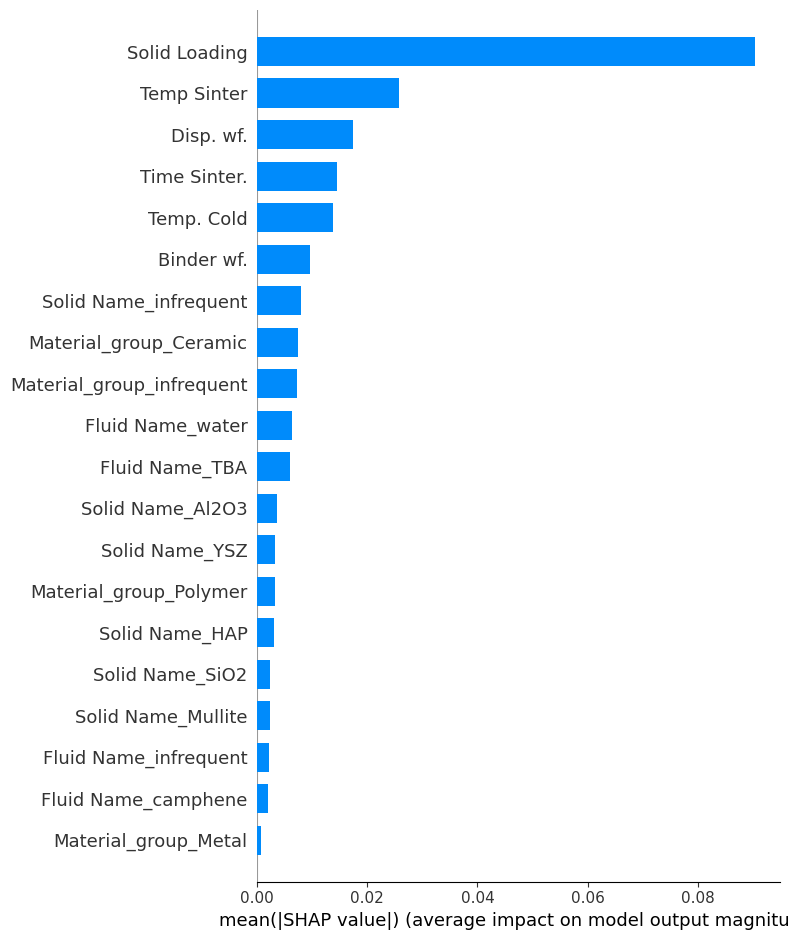

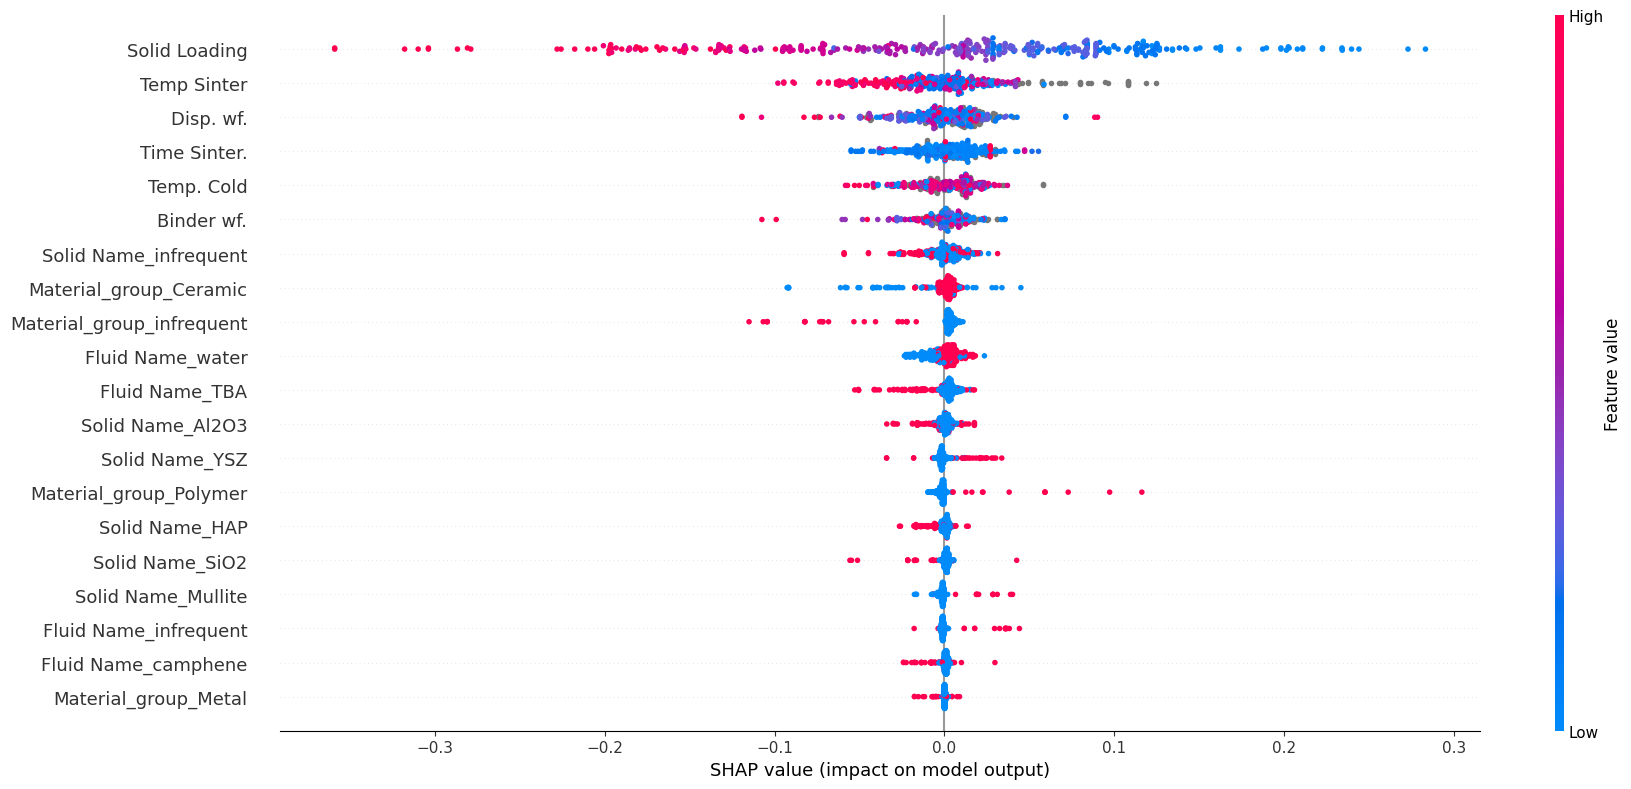

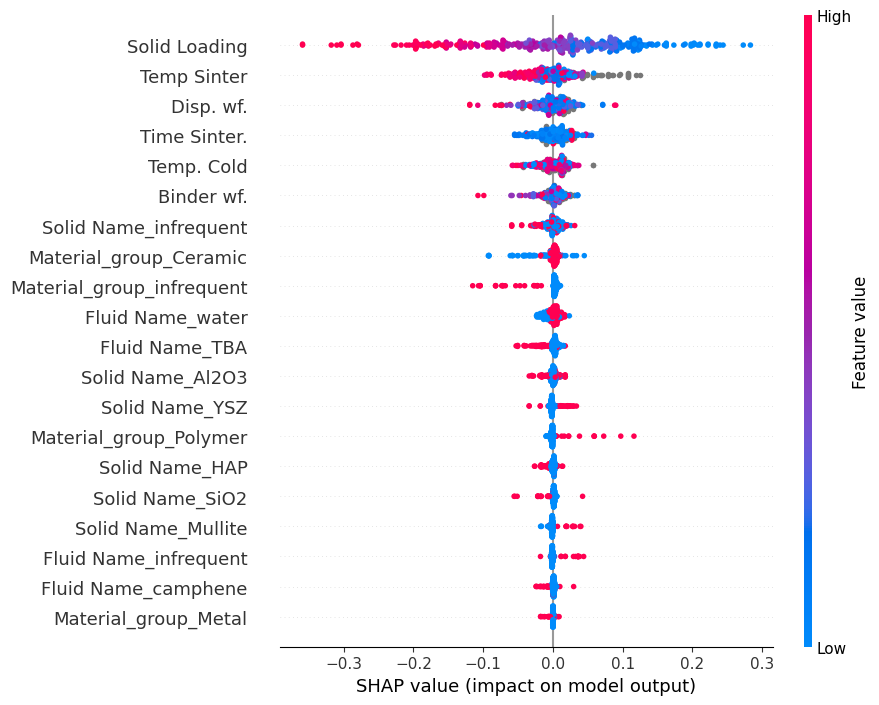

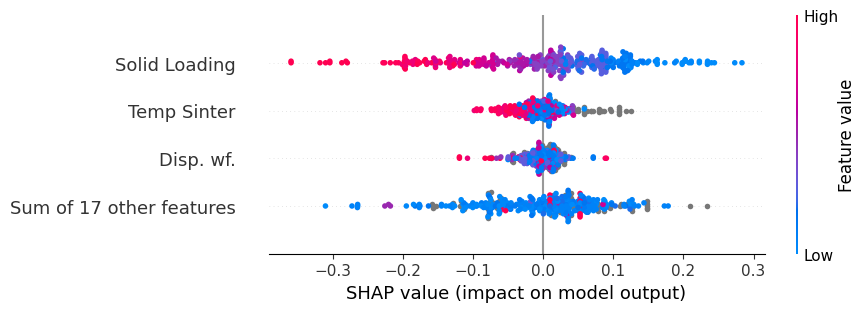

Saving summary plot to temp_models/pipe/reduced_feats/catb_onehot[selected]/catb_onehot[selected]-1h-210718-6-r0.92-r0.81-ma0.059-ms0.008/shap/test/summary.png
Shap Finished


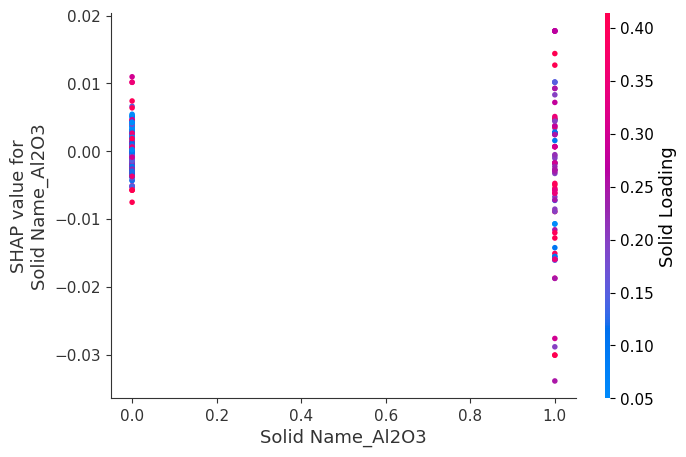

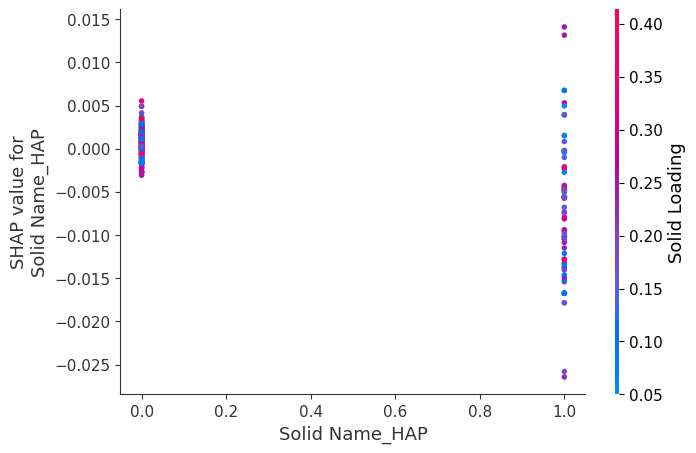

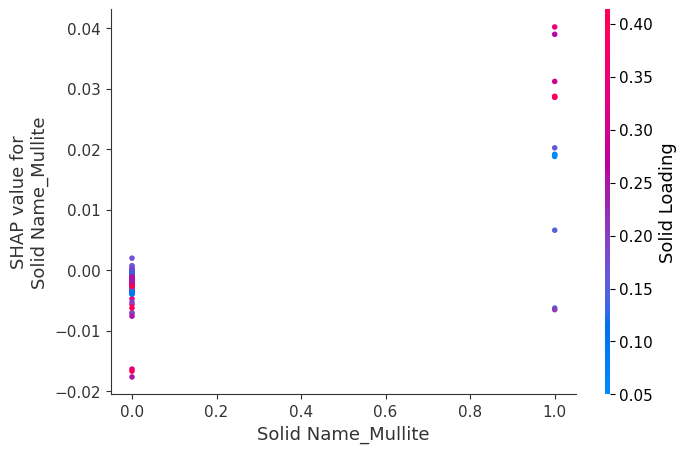

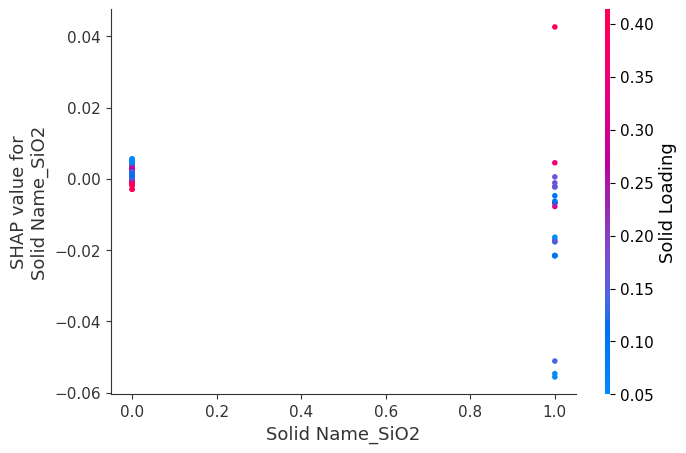

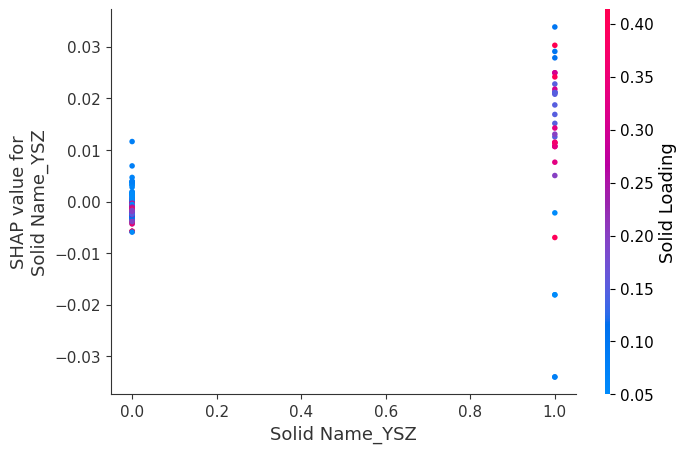

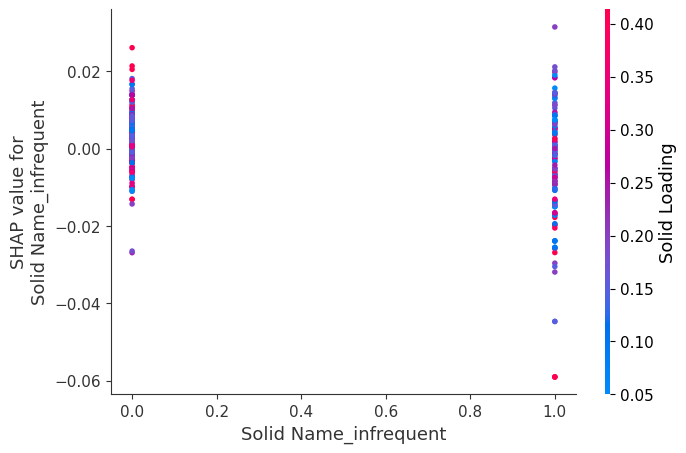

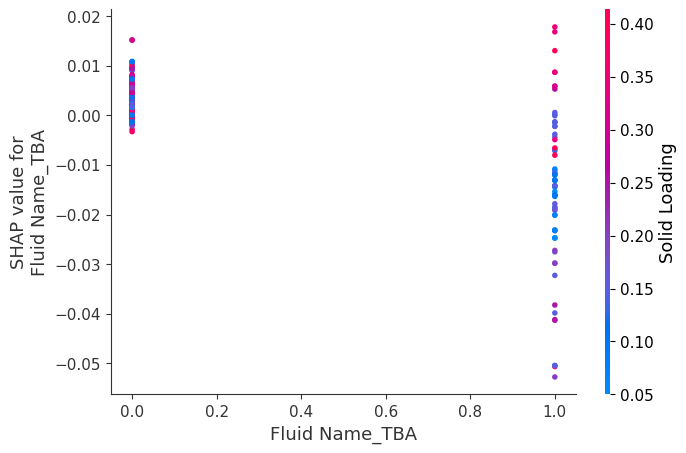

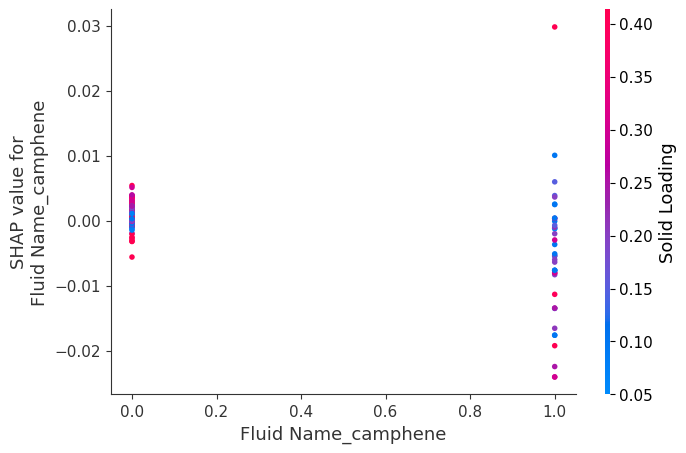

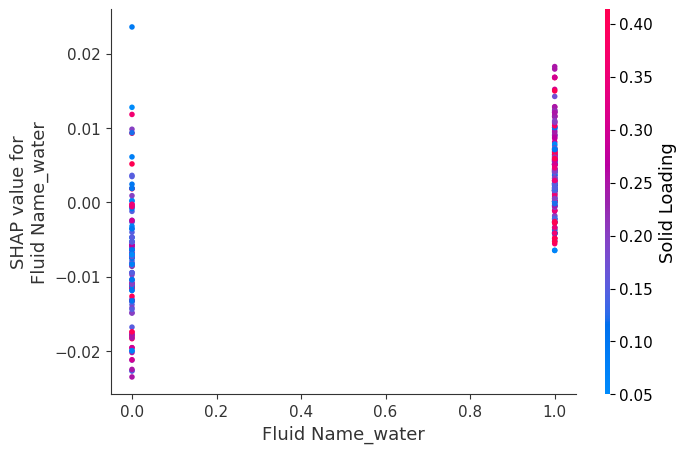

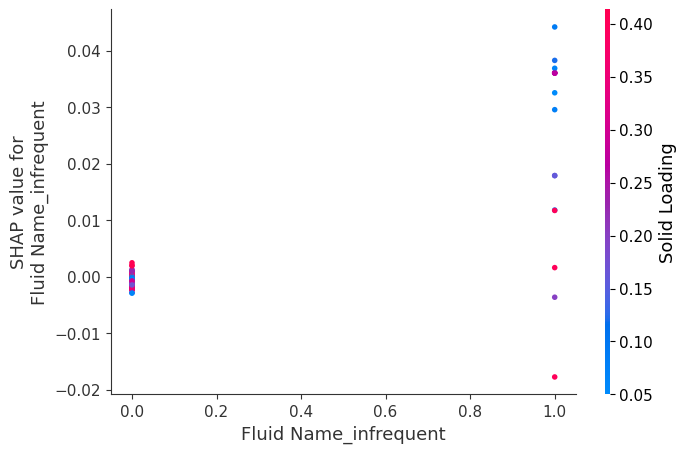

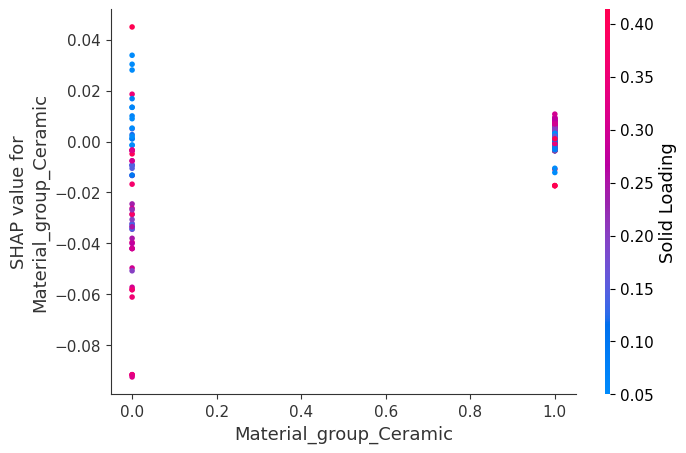

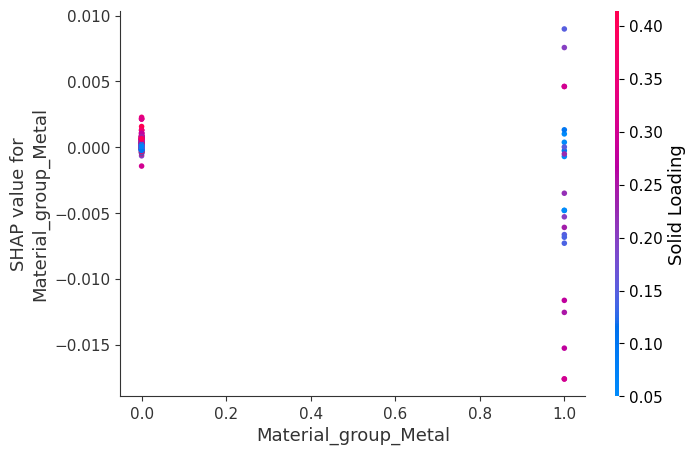

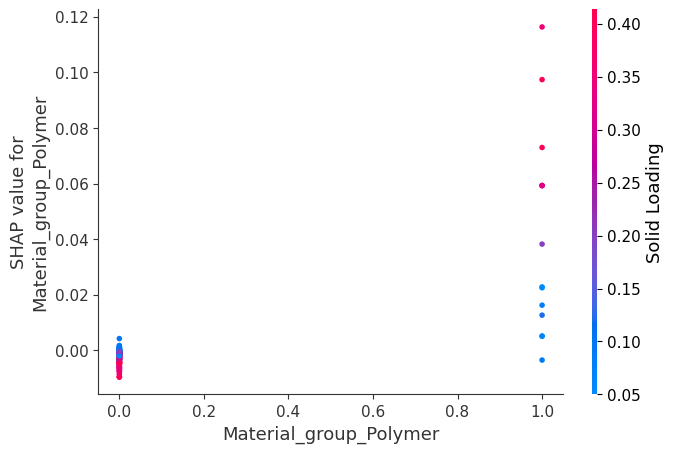

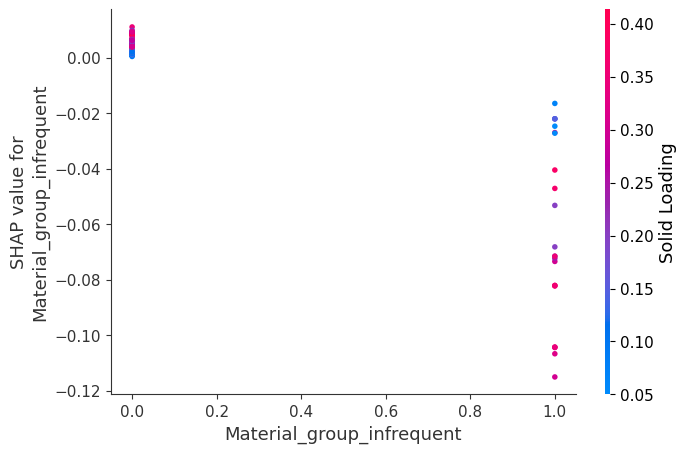

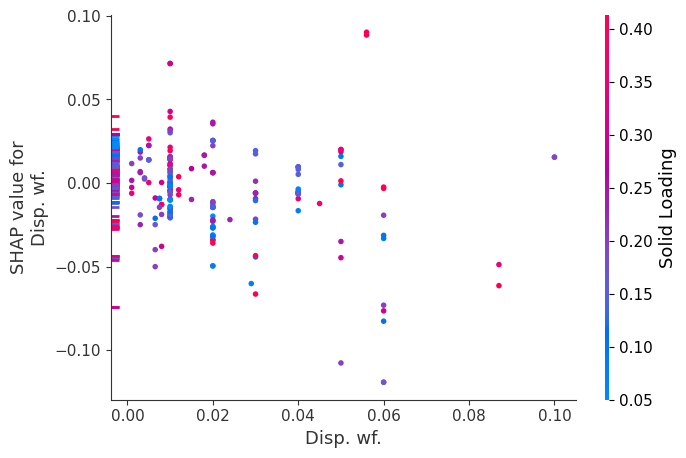

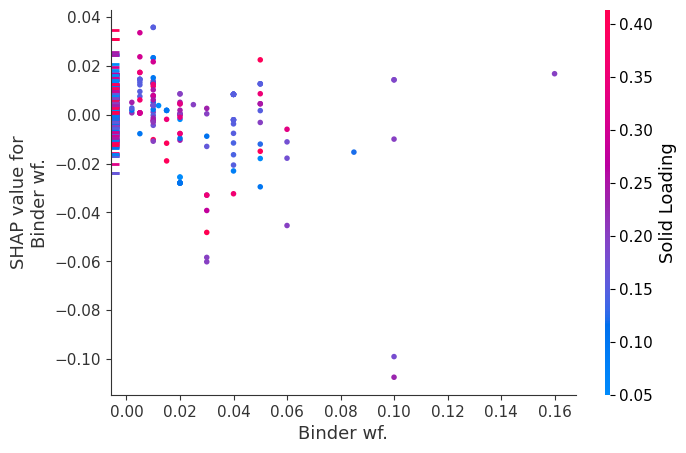

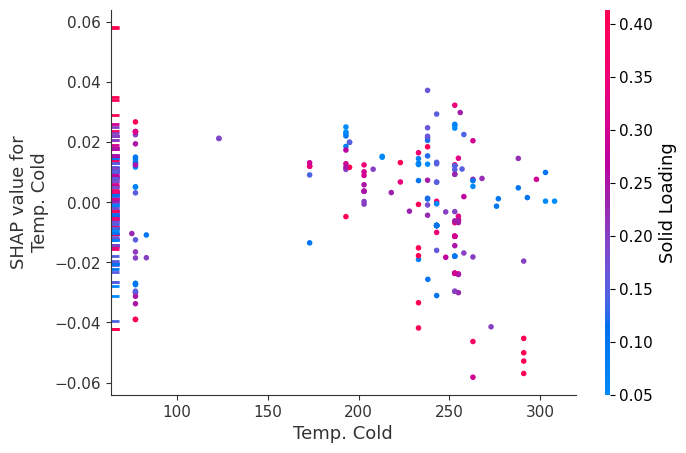

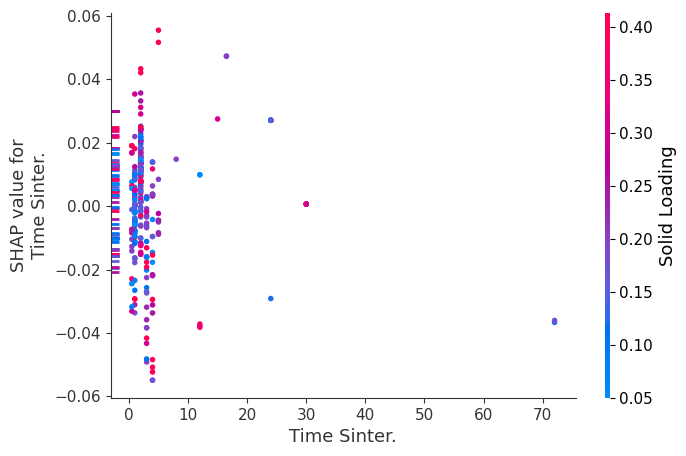

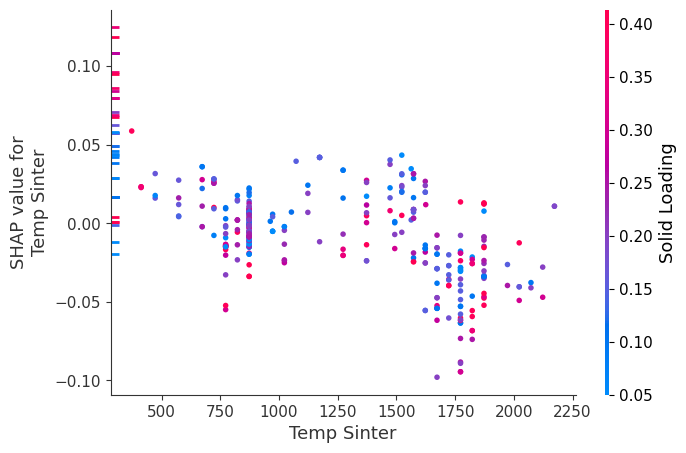

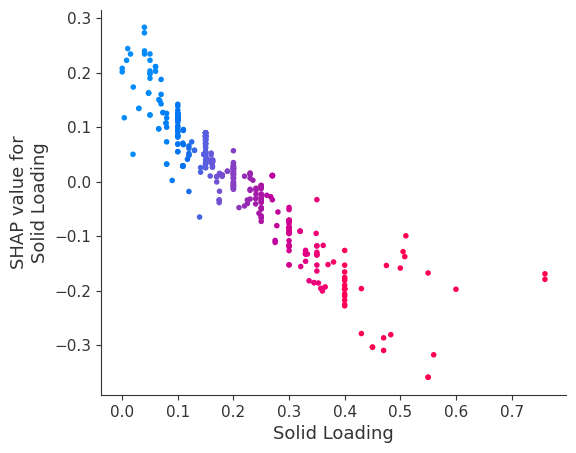

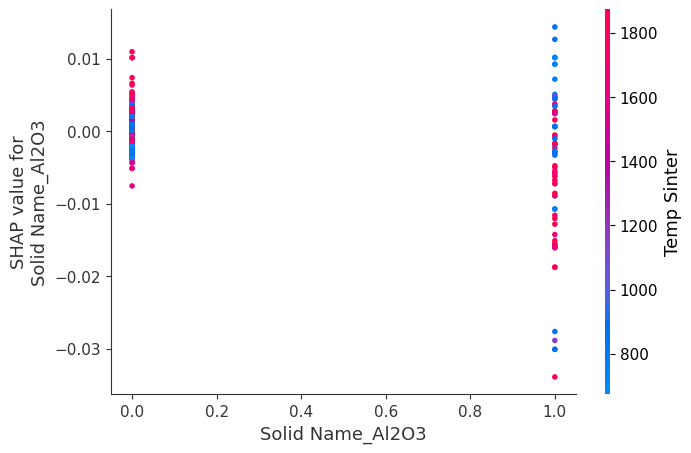

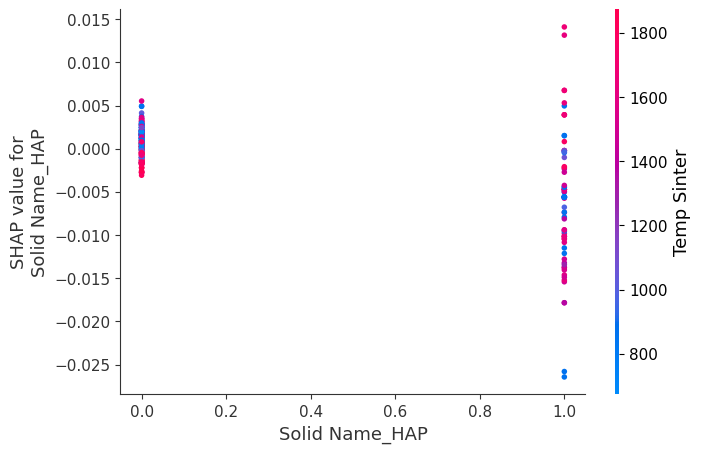

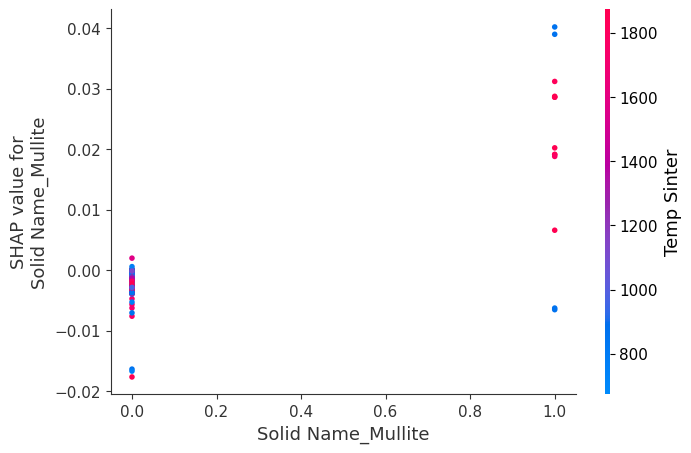

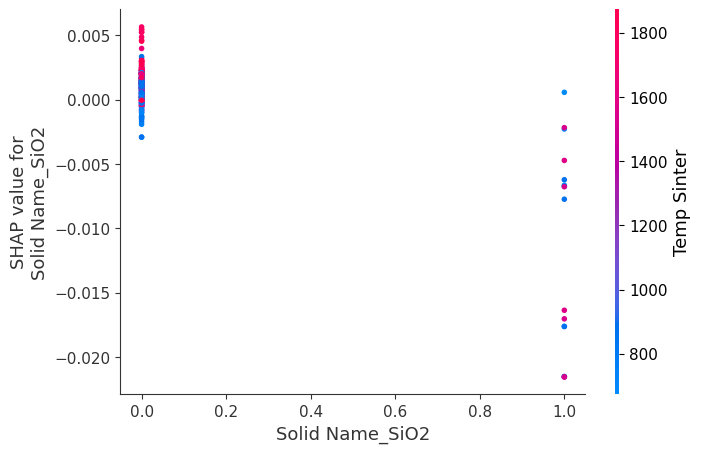

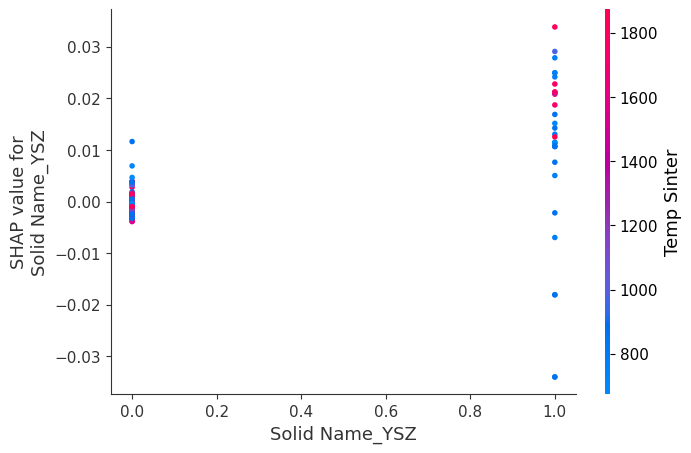

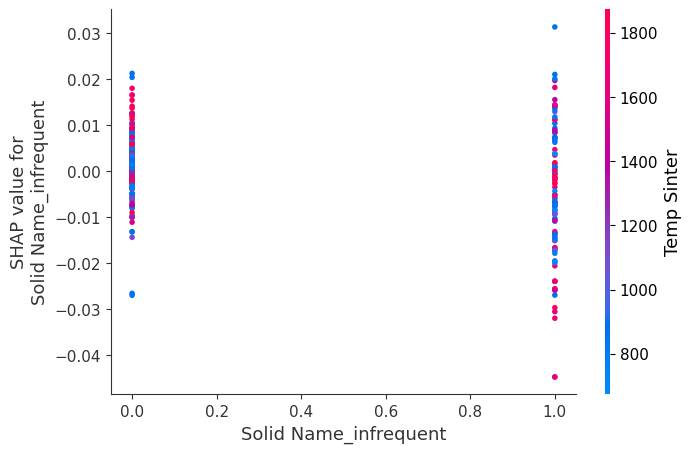

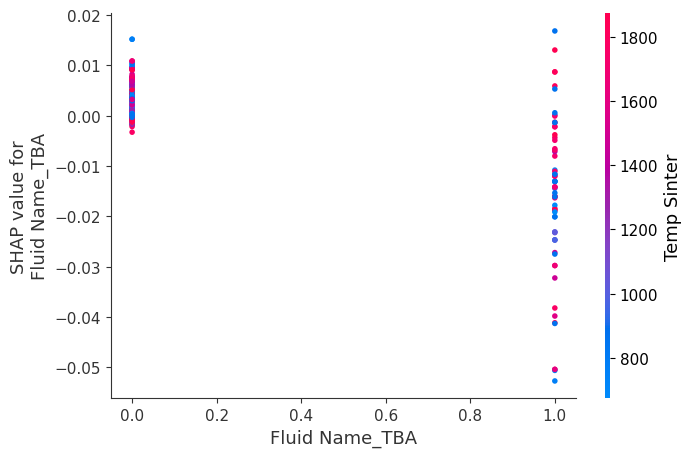

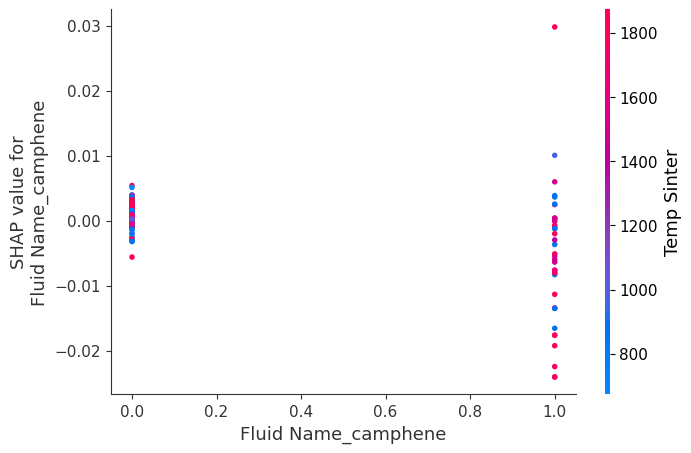

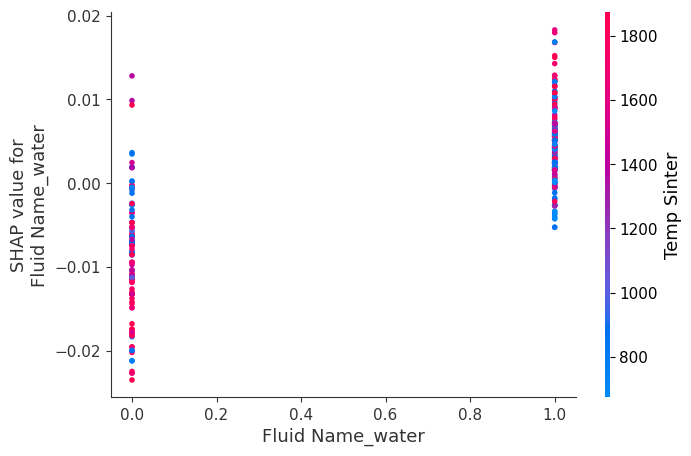

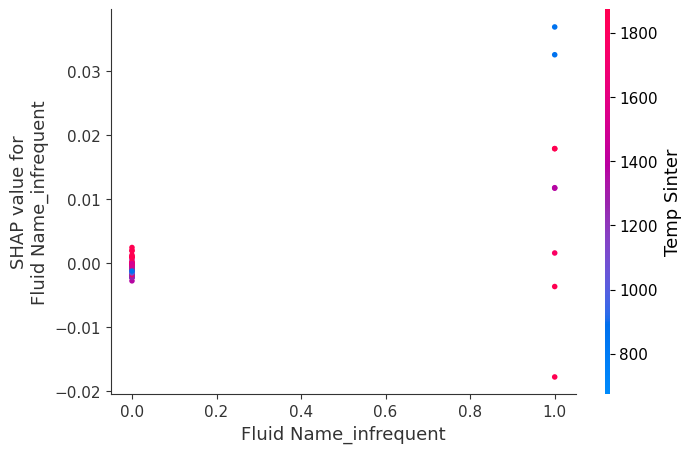

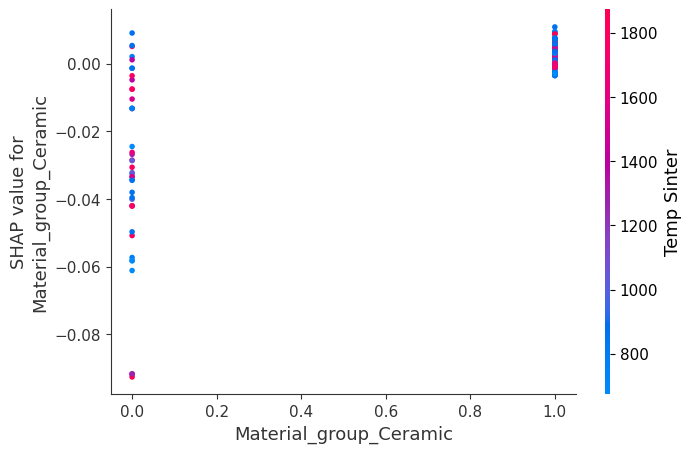

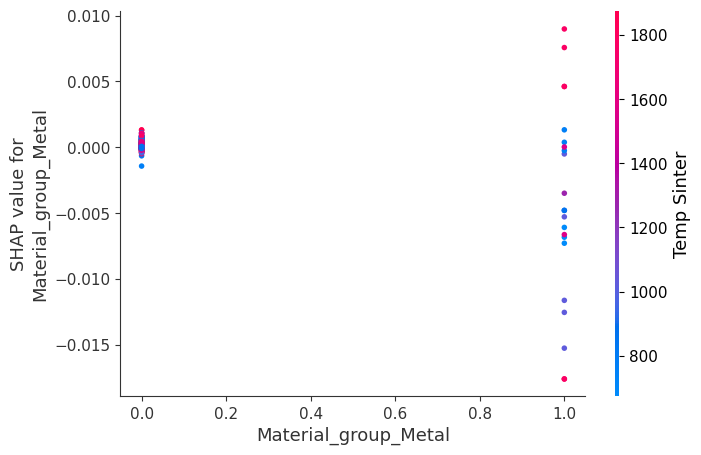

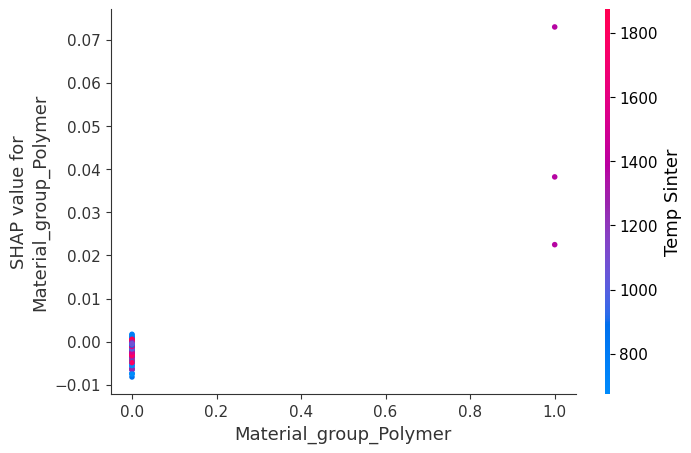

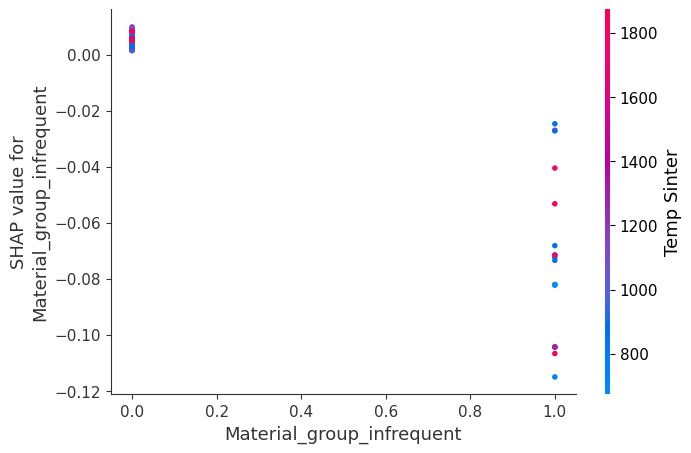

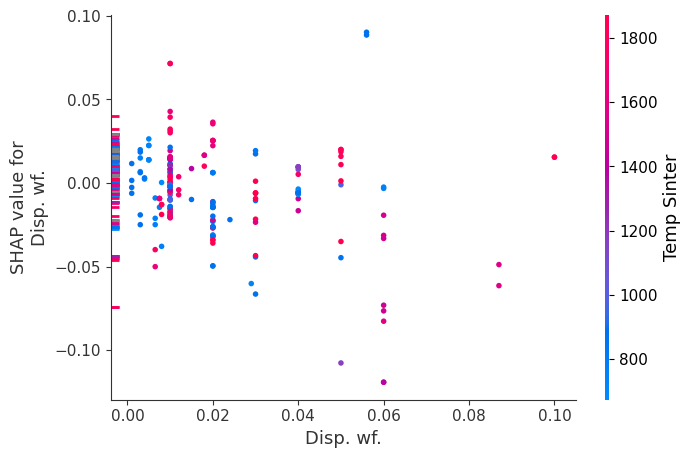

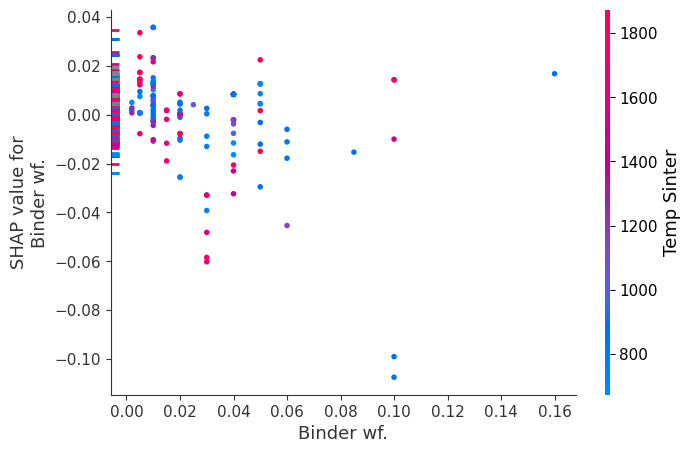

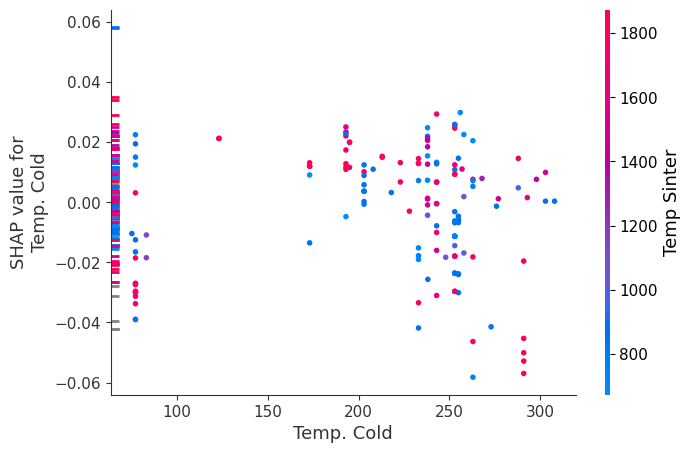

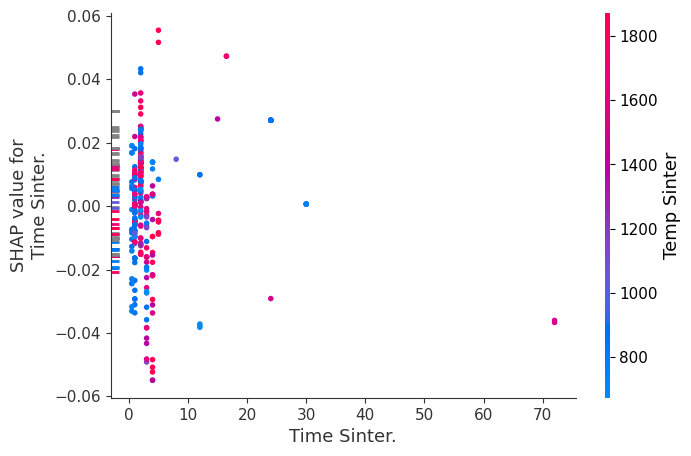

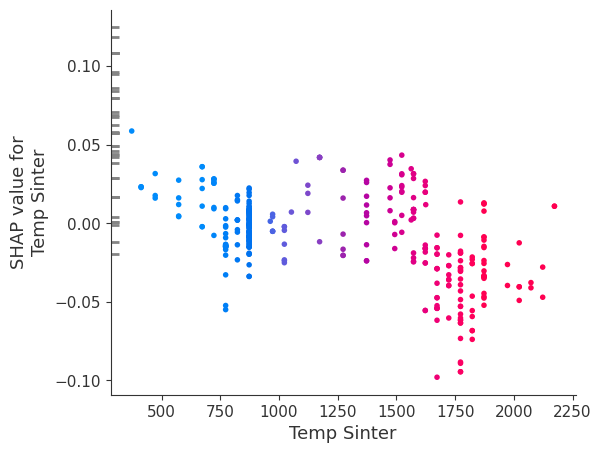

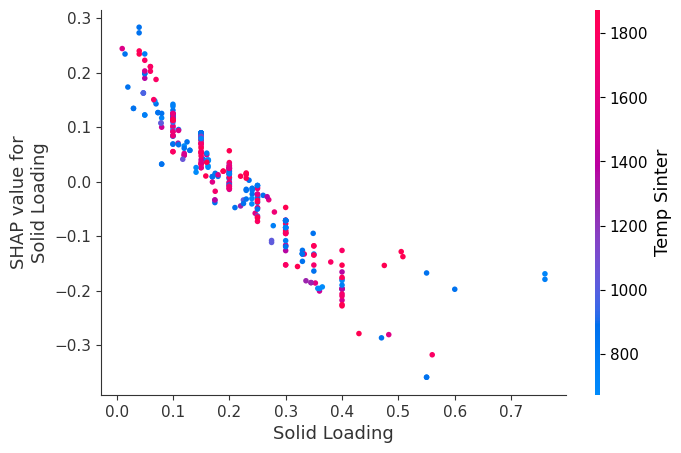

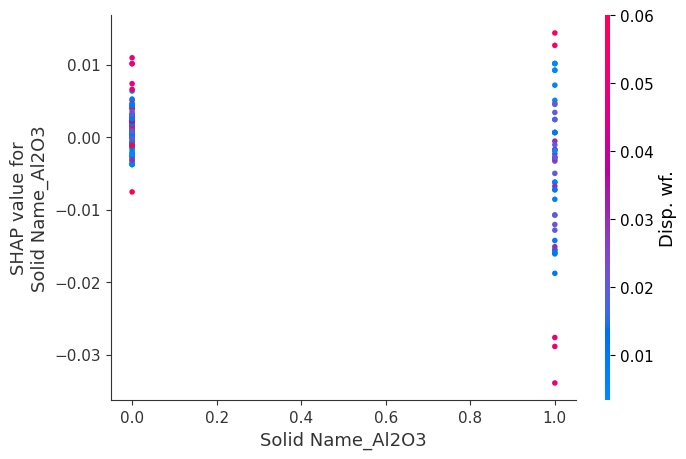

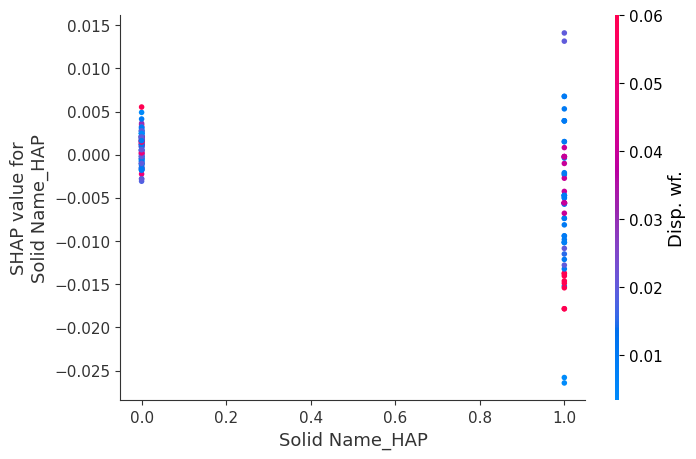

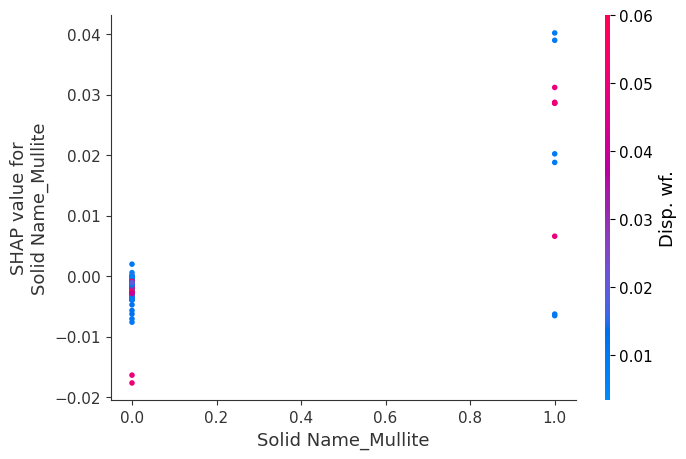

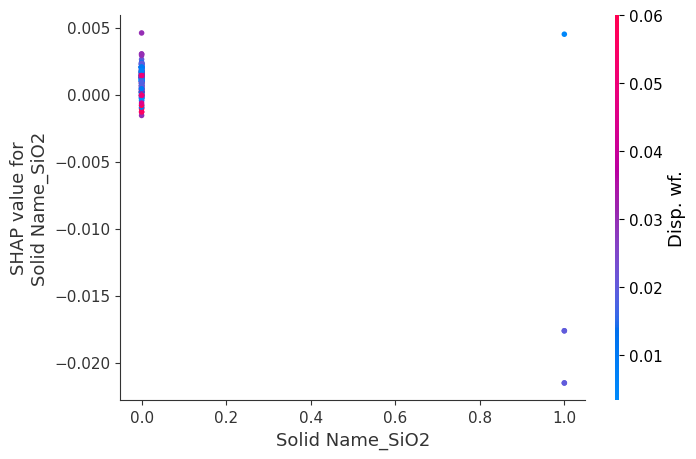

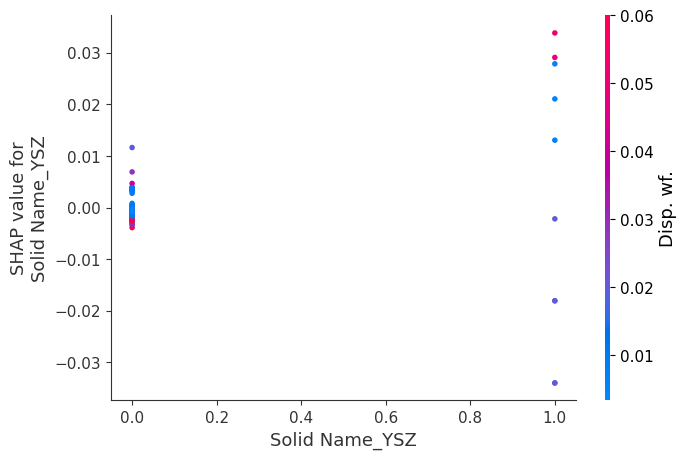

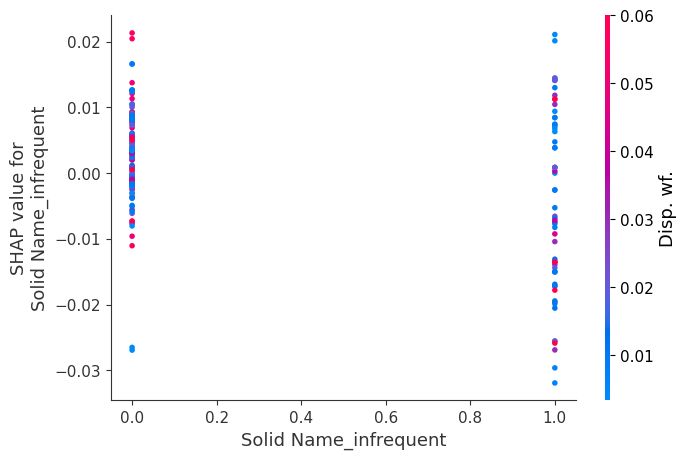

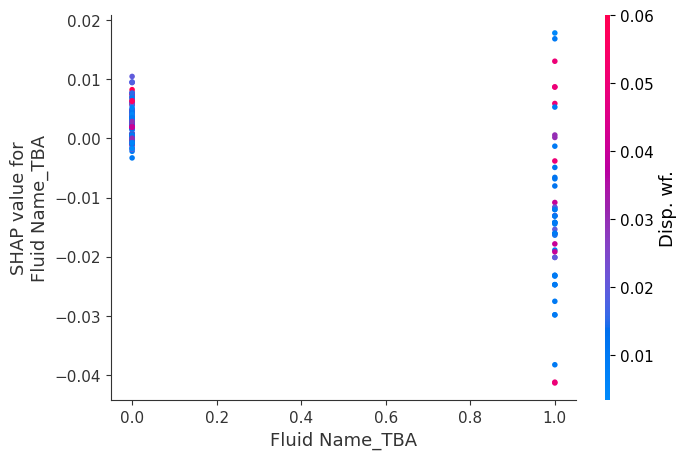

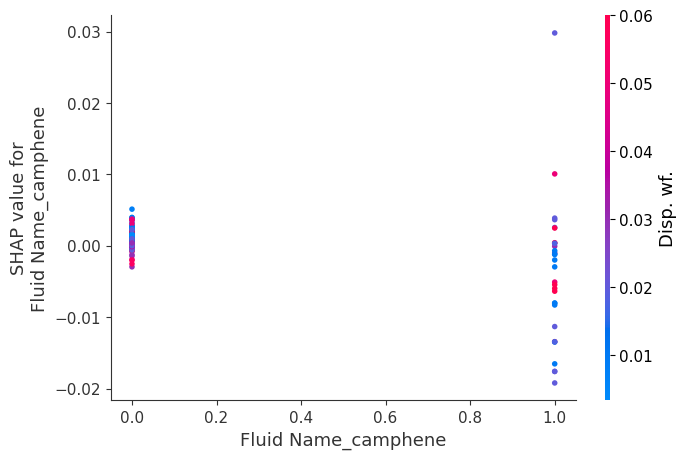

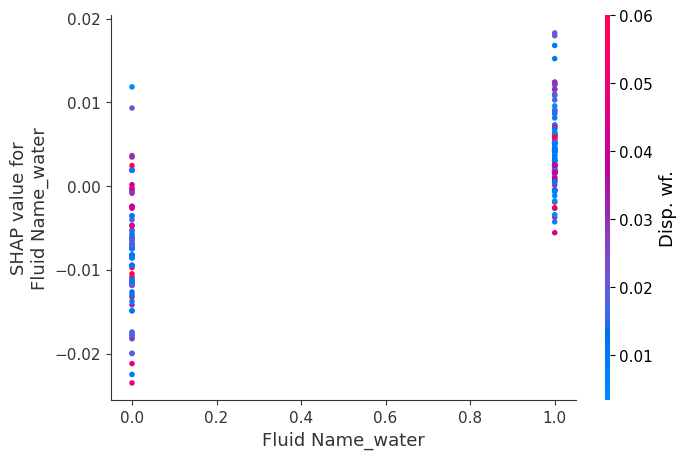

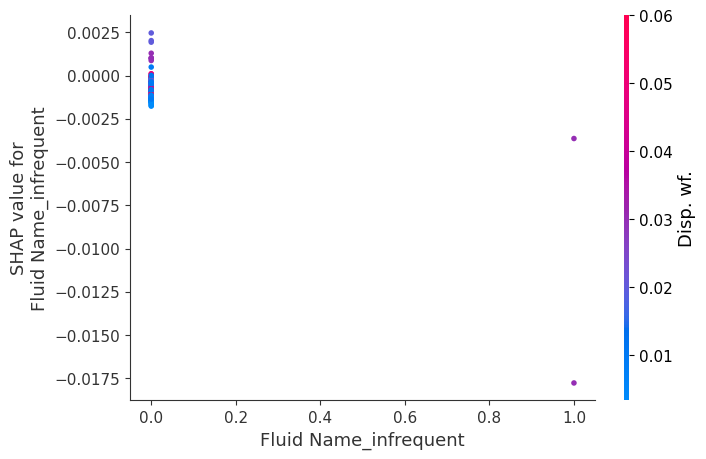

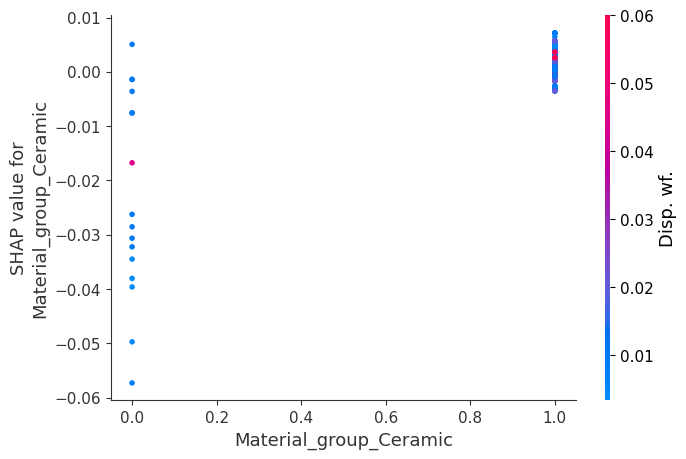

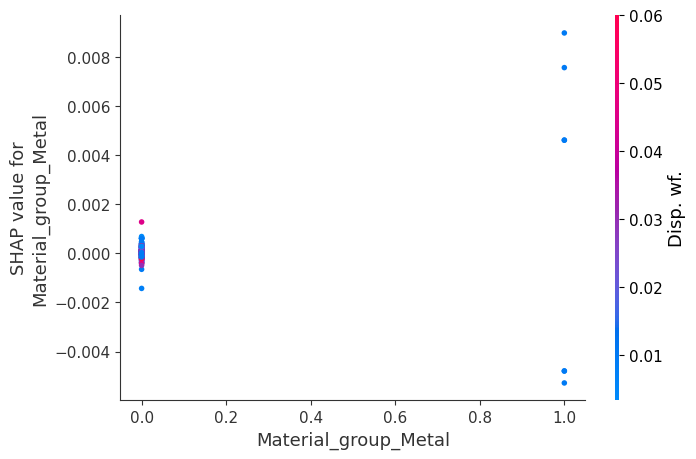

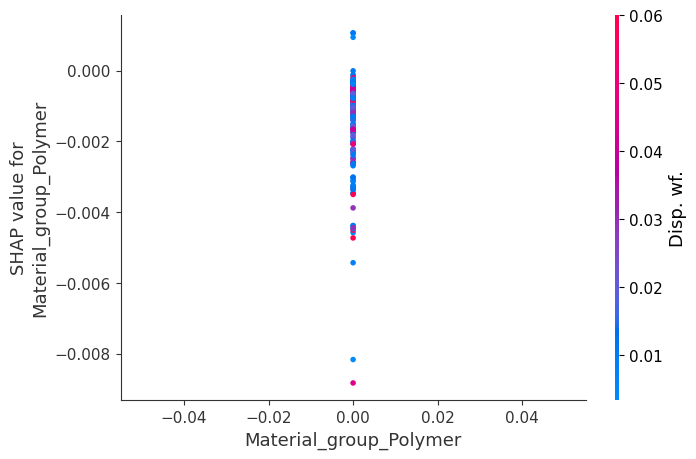

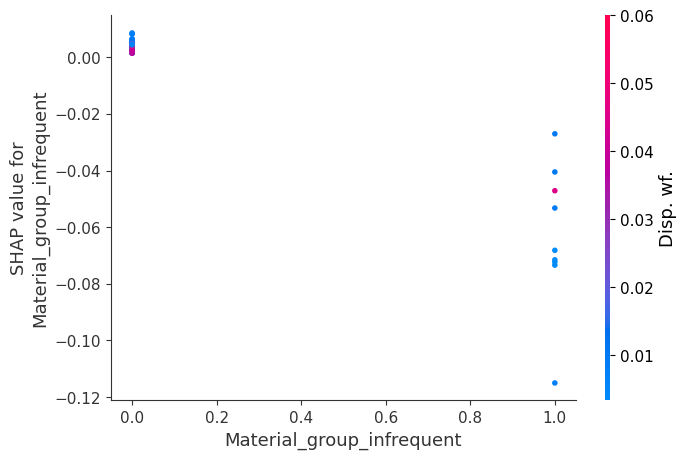

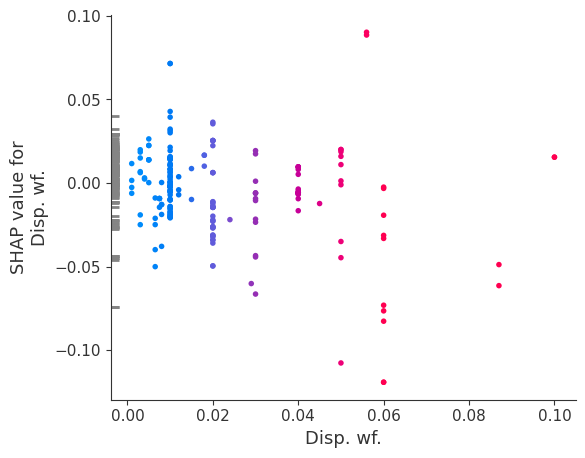

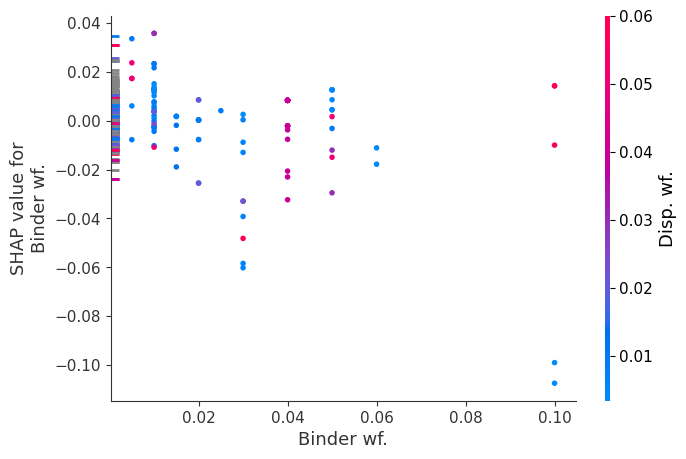

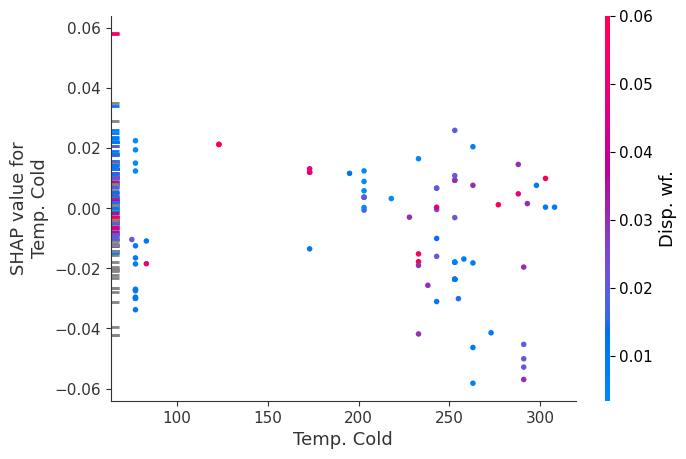

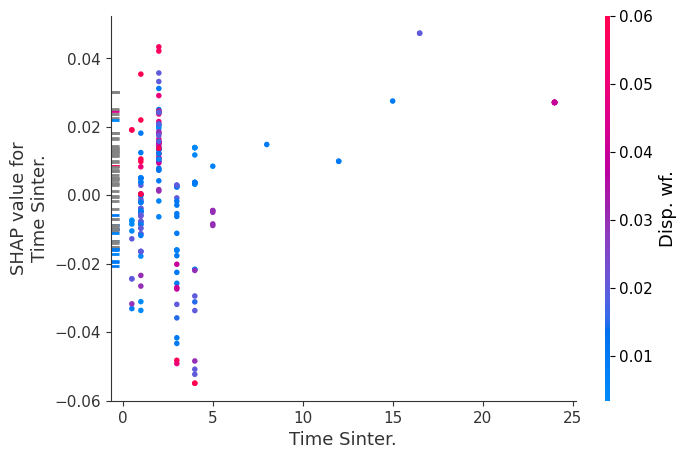

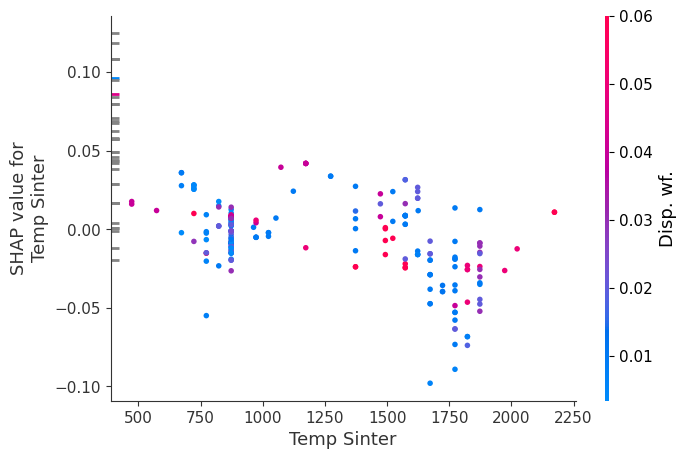

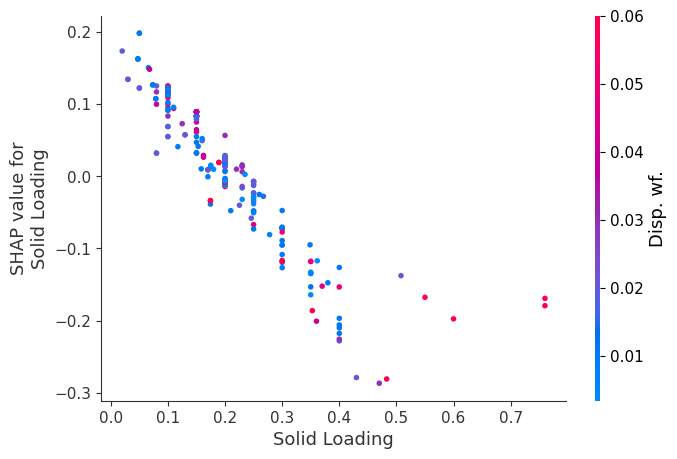

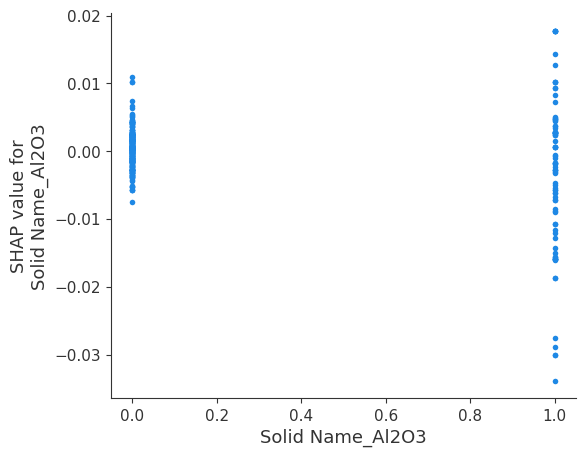

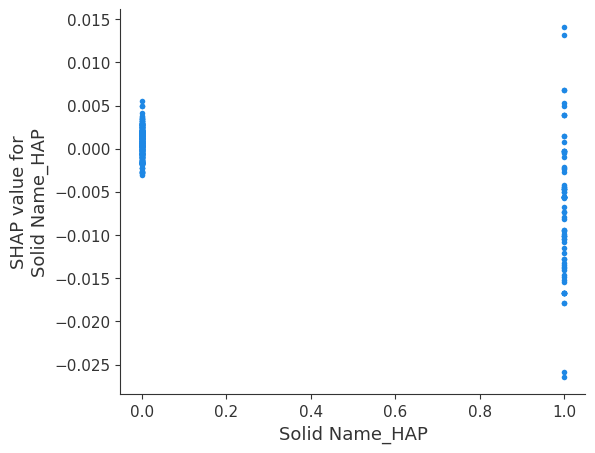

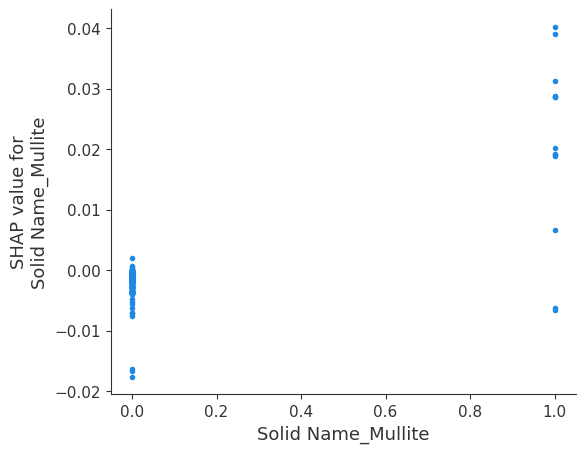

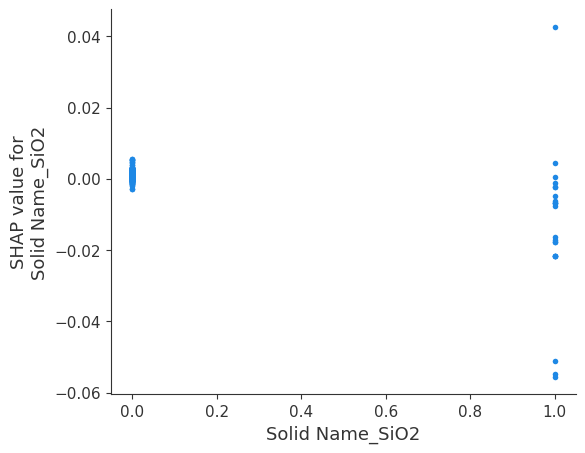

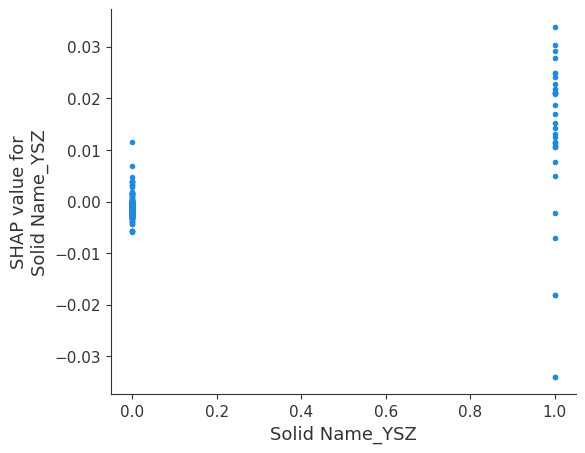

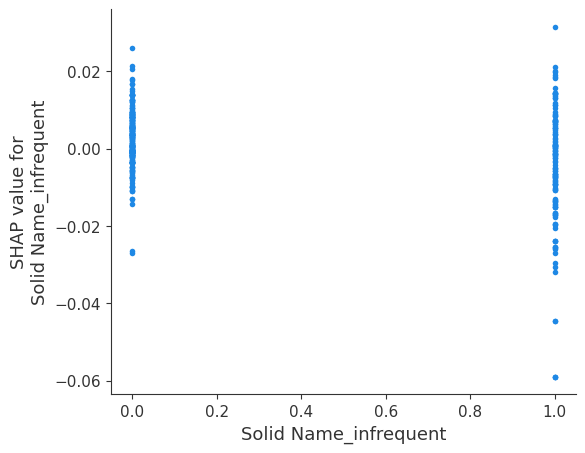

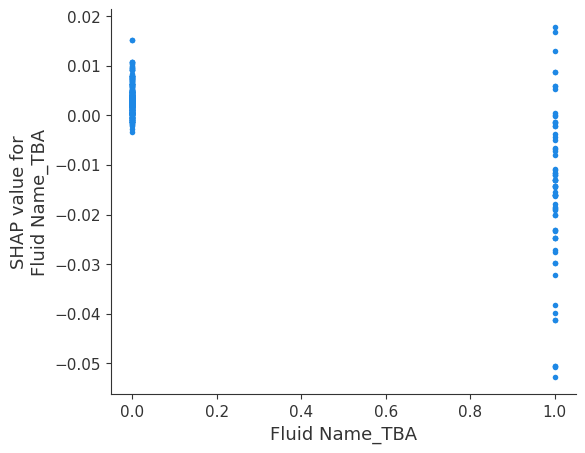

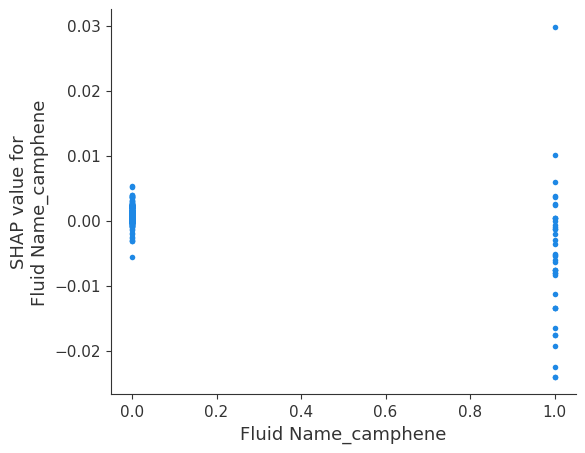

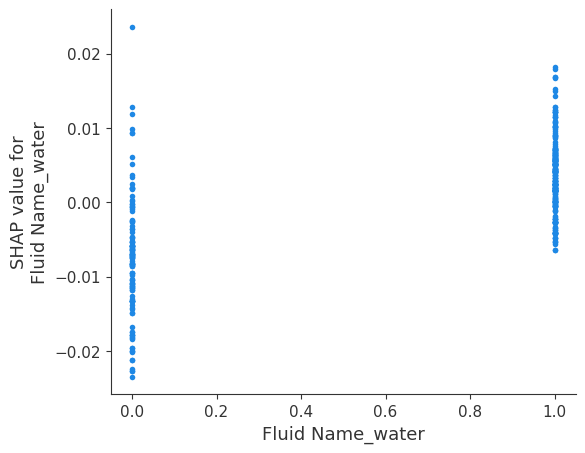

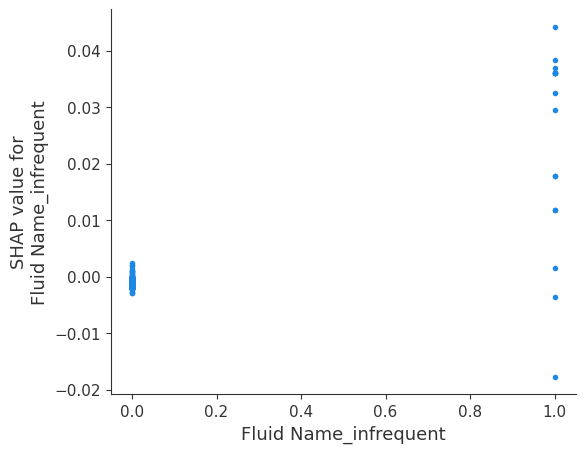

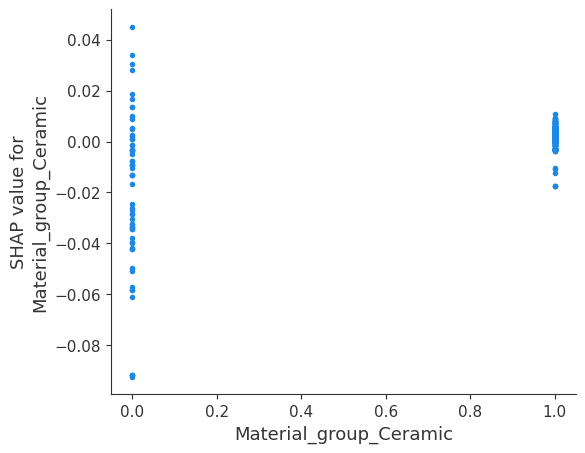

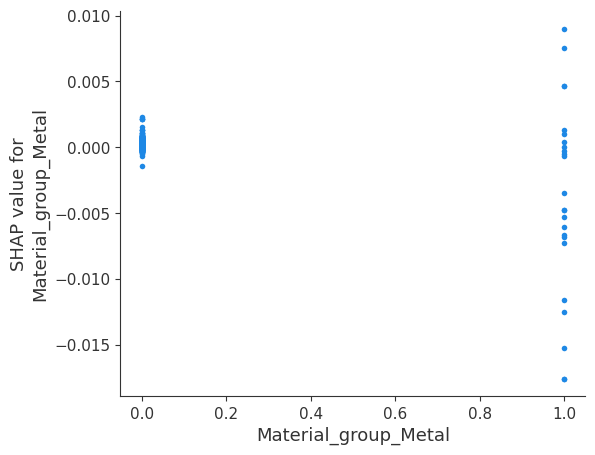

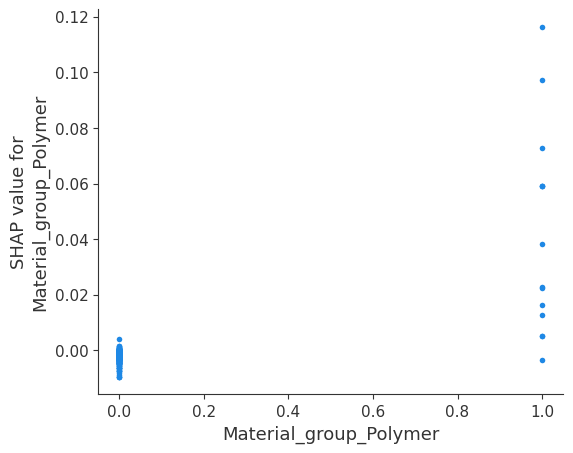

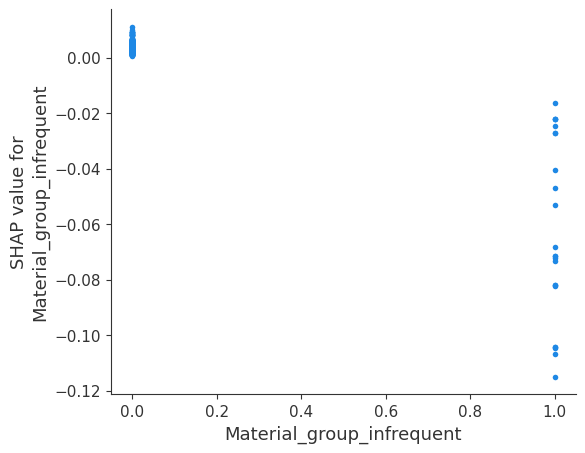

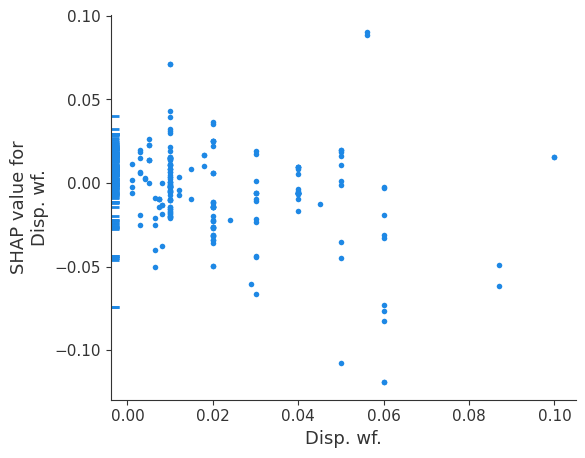

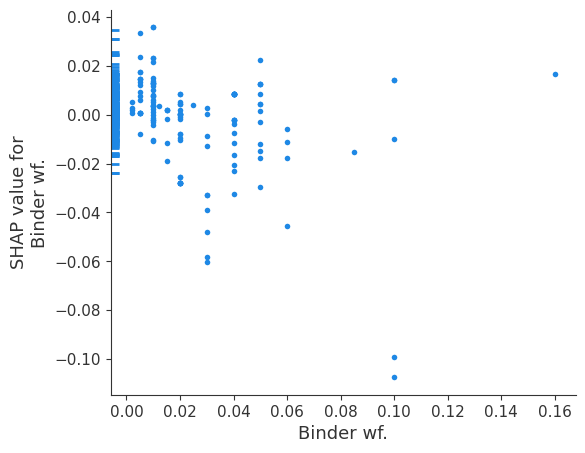

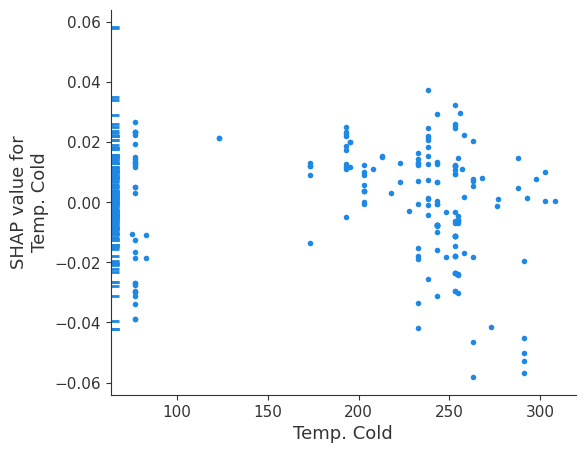

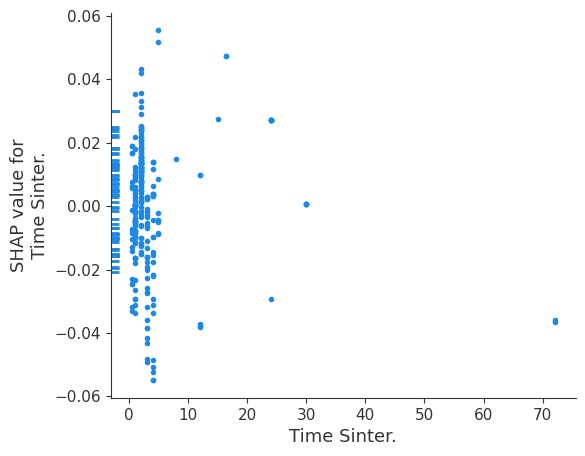

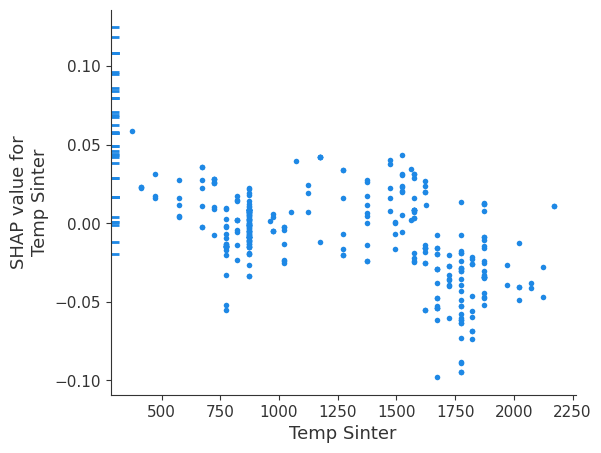

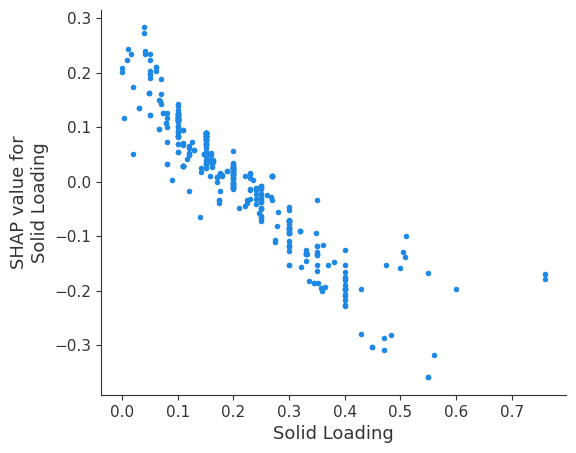

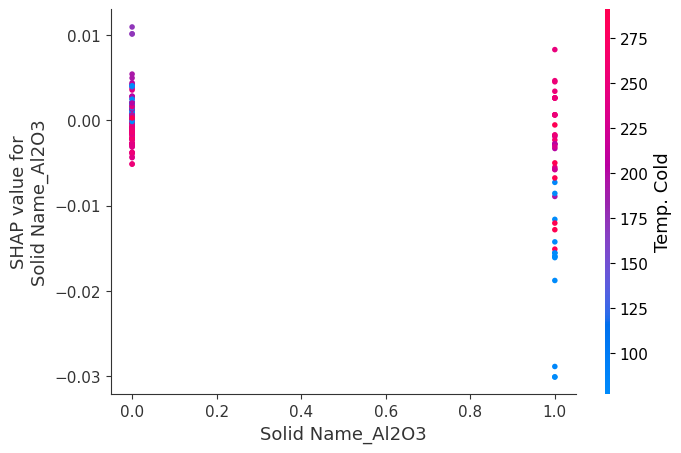

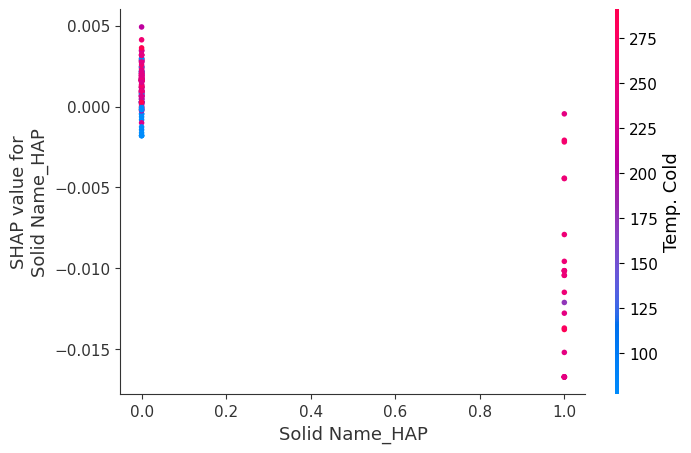

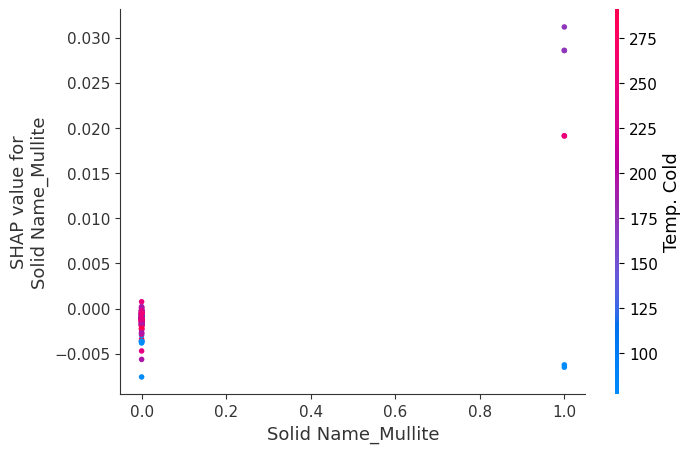

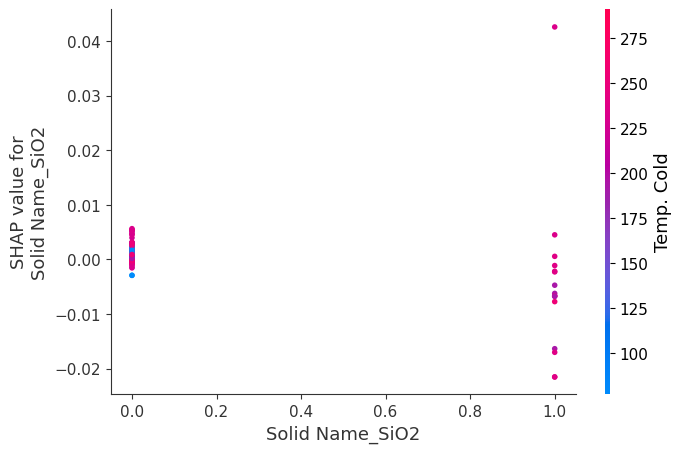

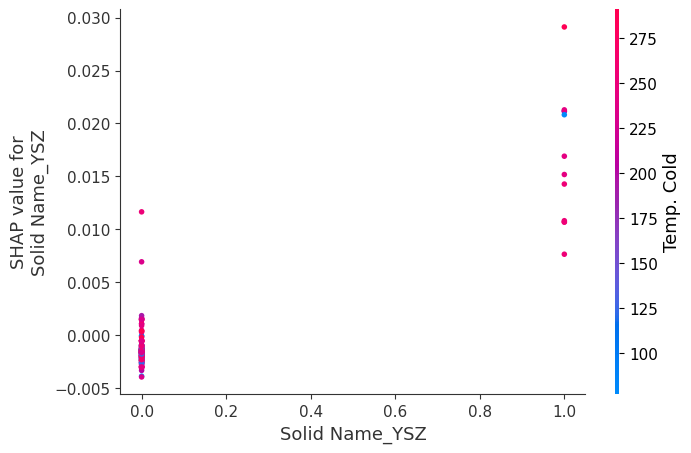

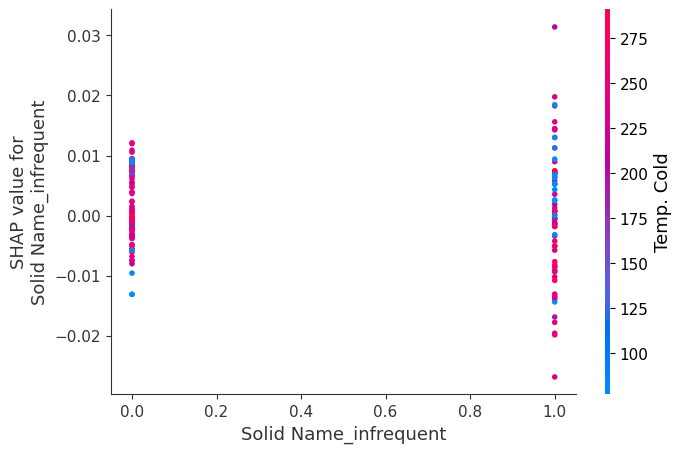

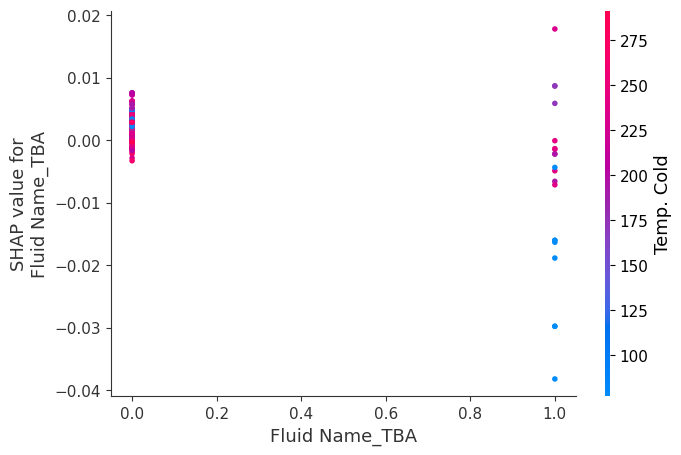

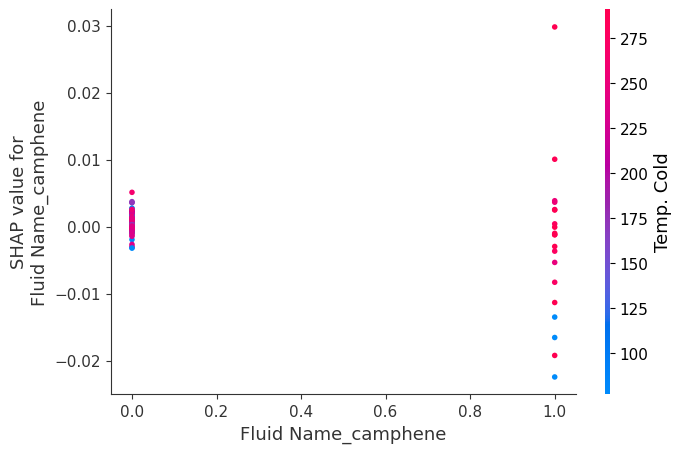

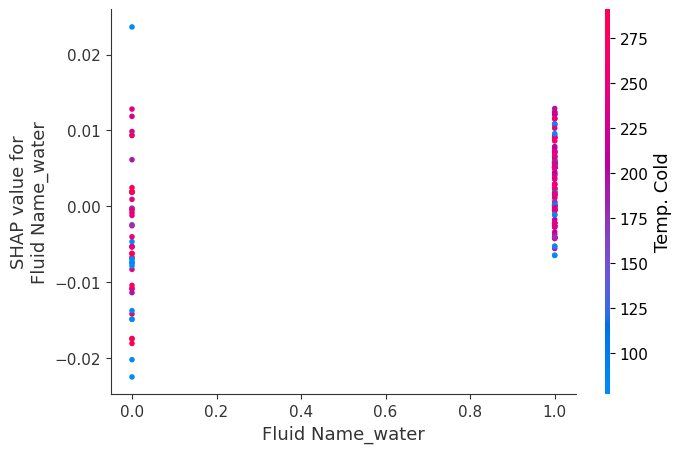

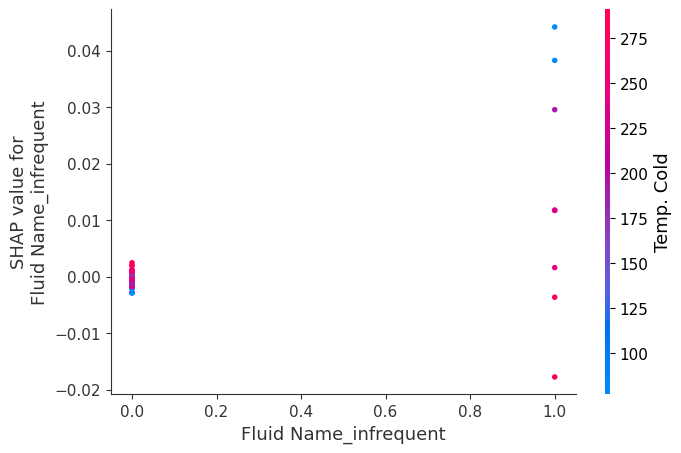

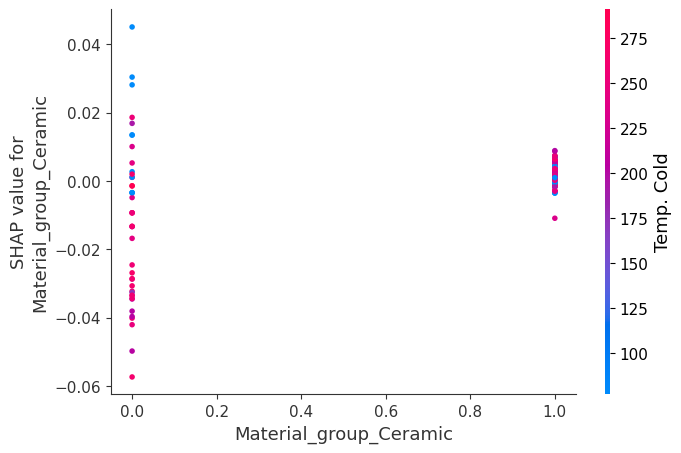

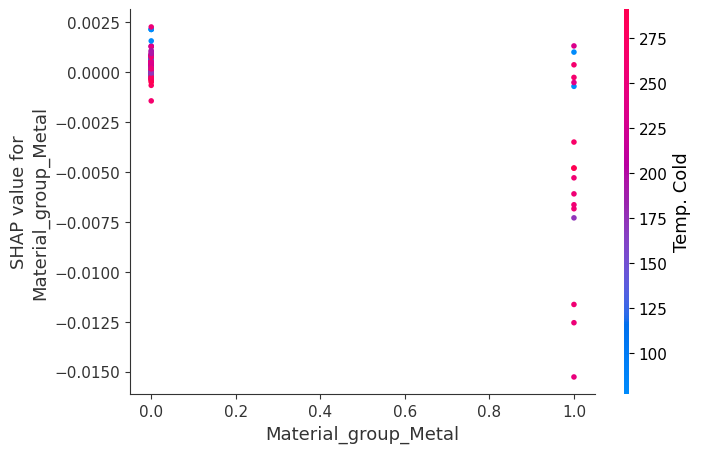

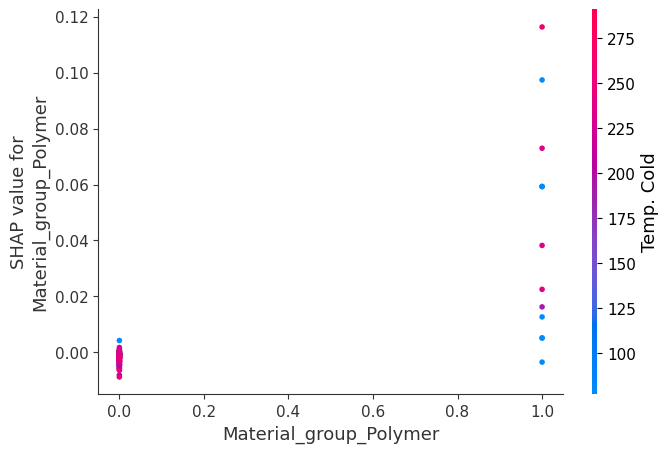

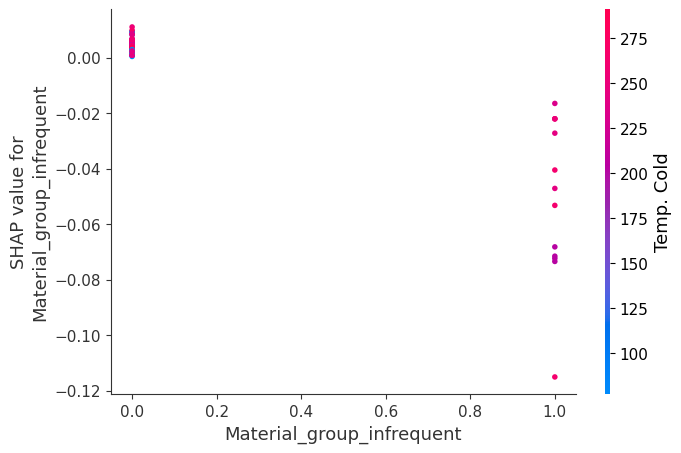

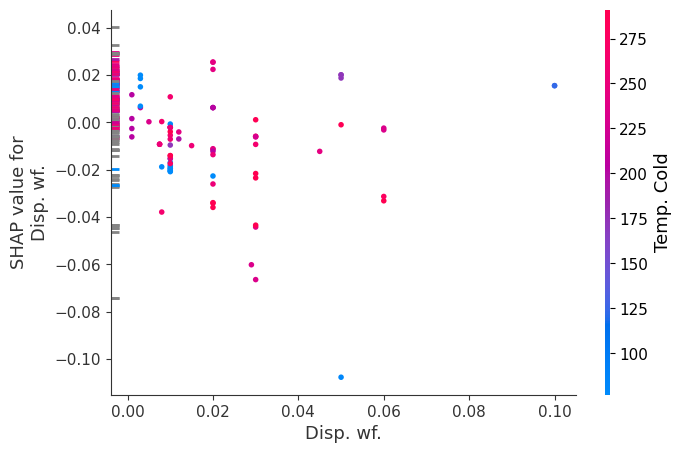

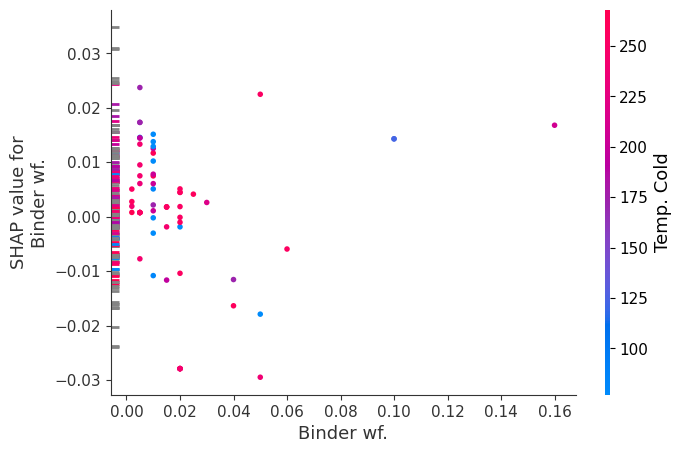

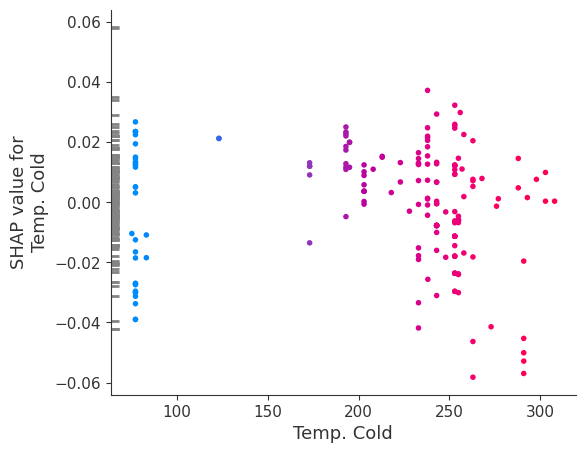

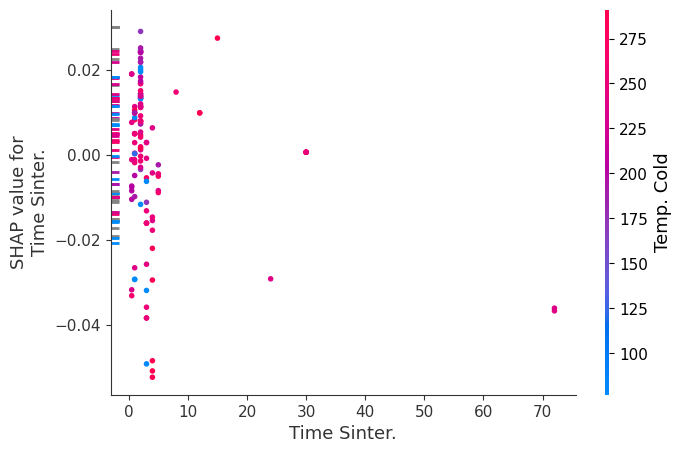

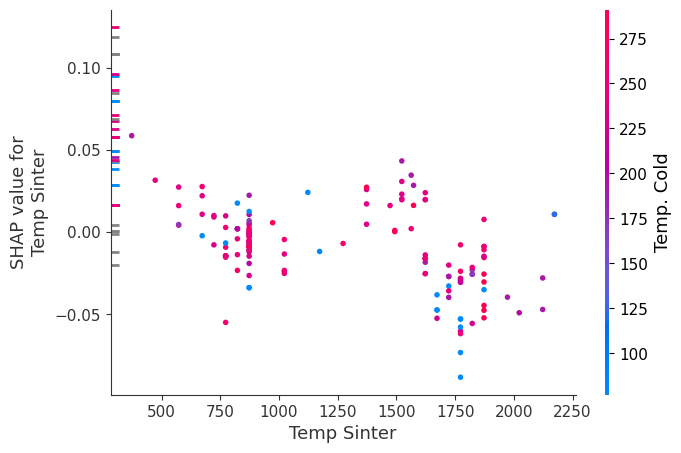

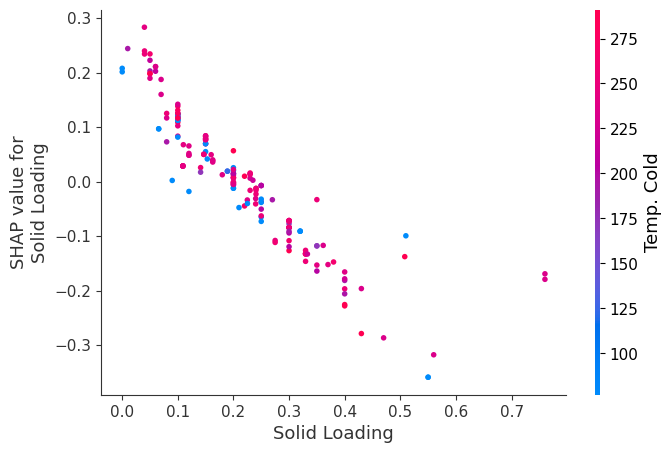

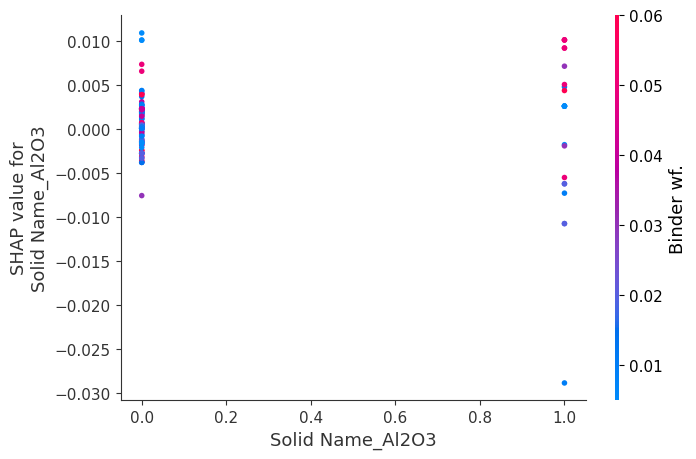

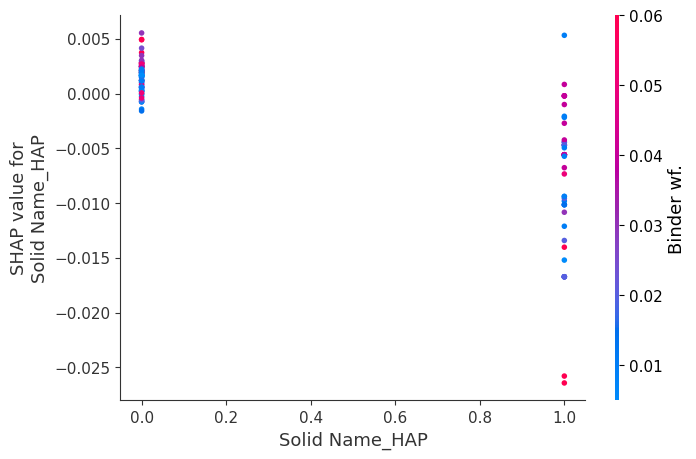

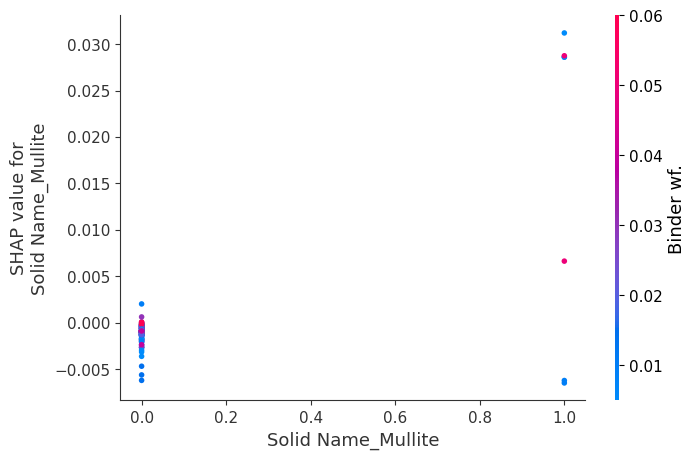

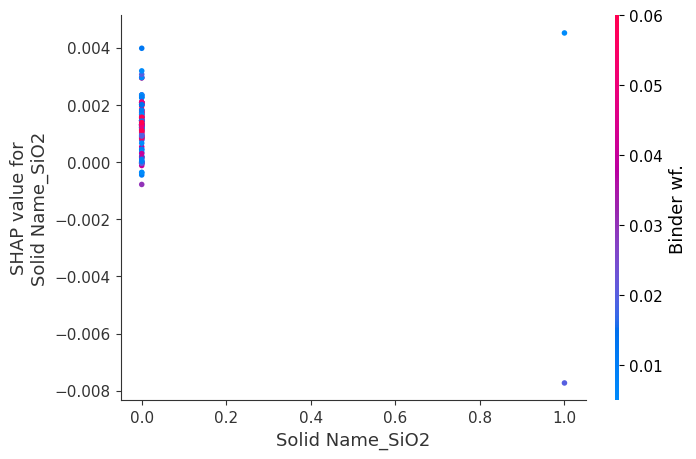

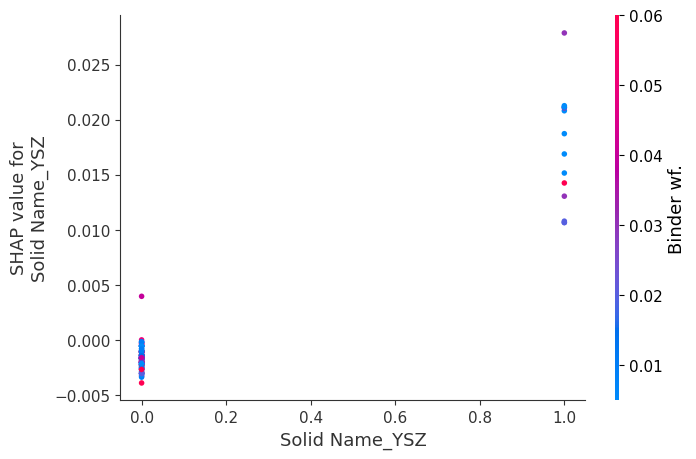

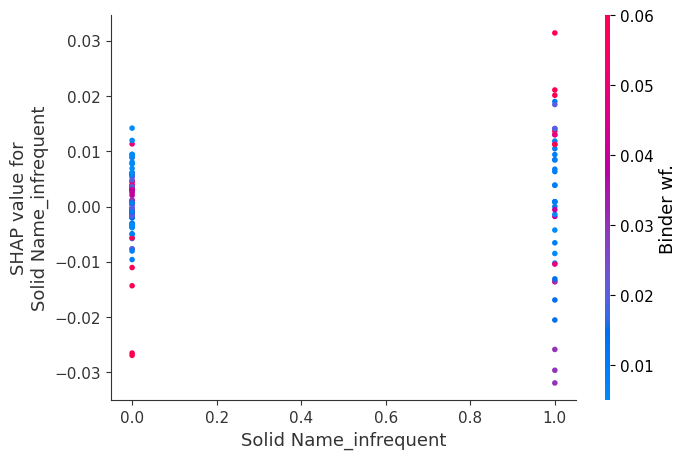

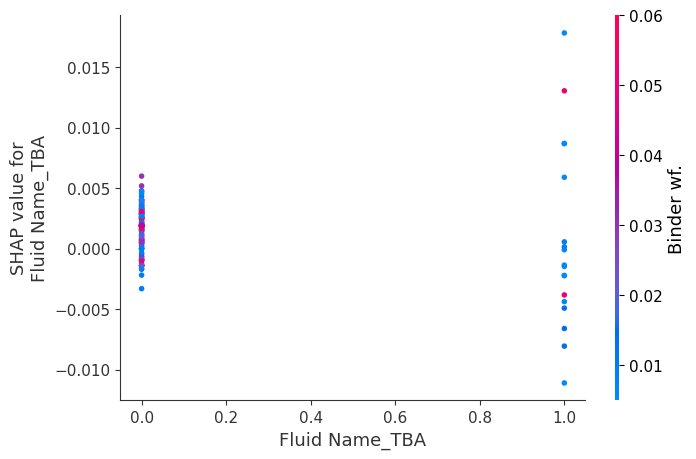

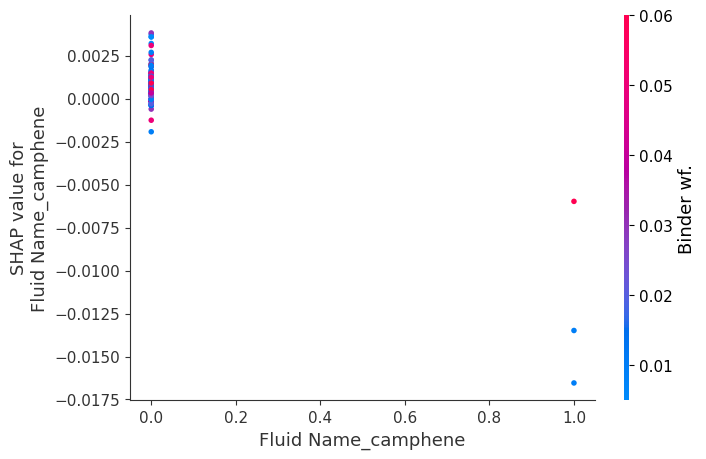

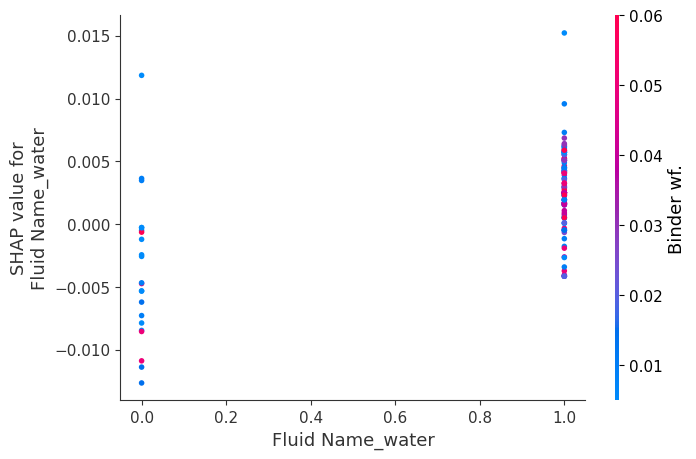

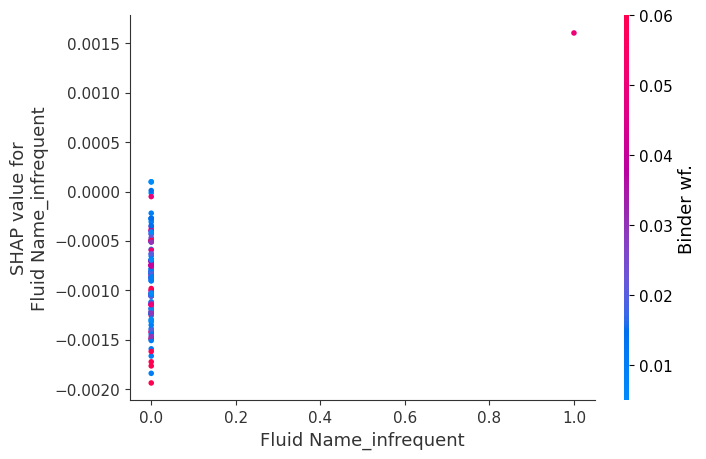

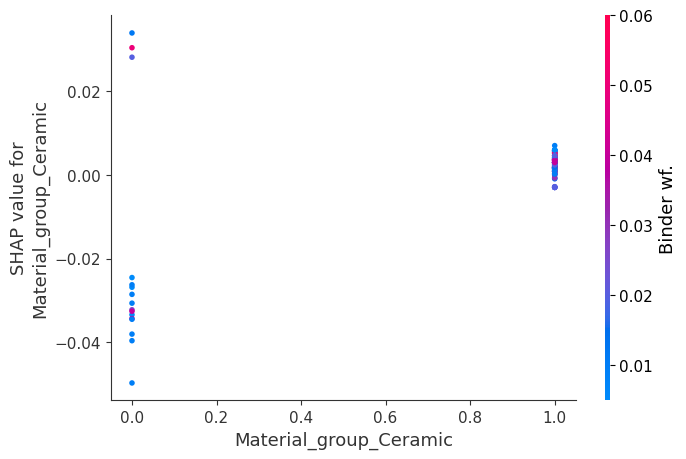

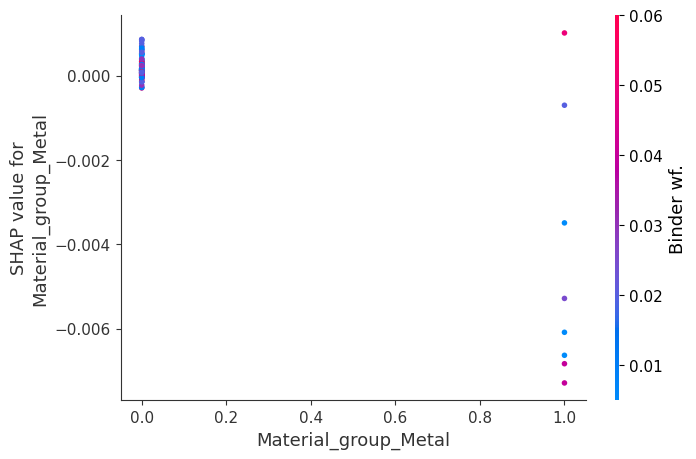

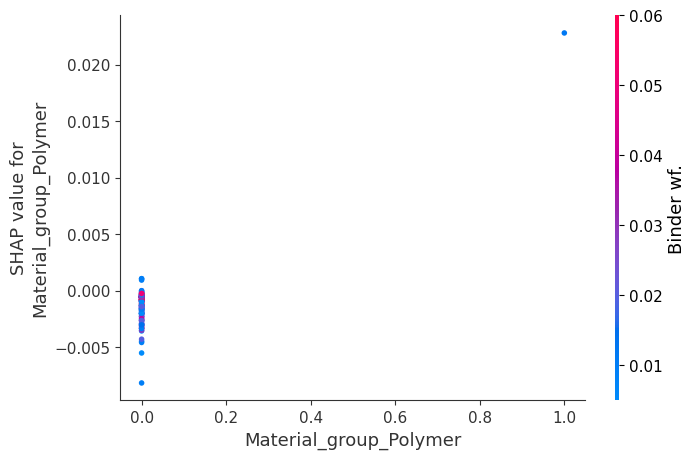

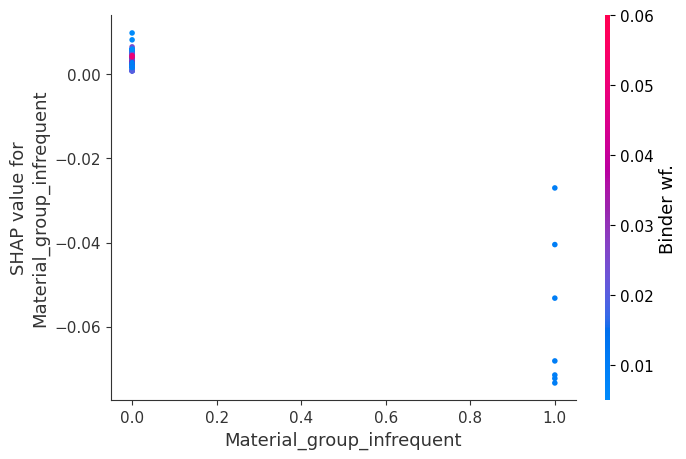

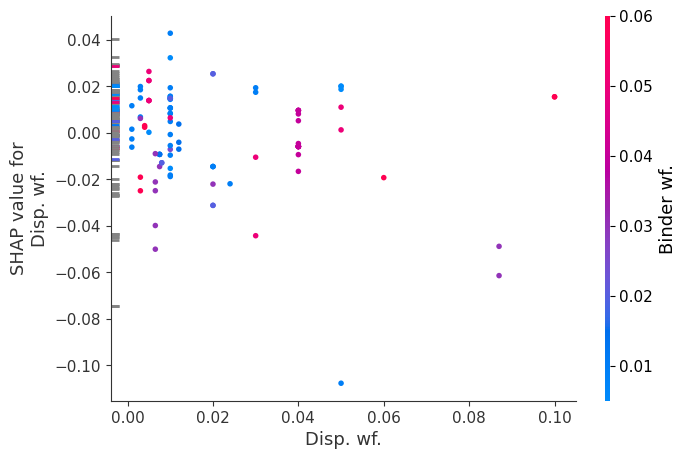

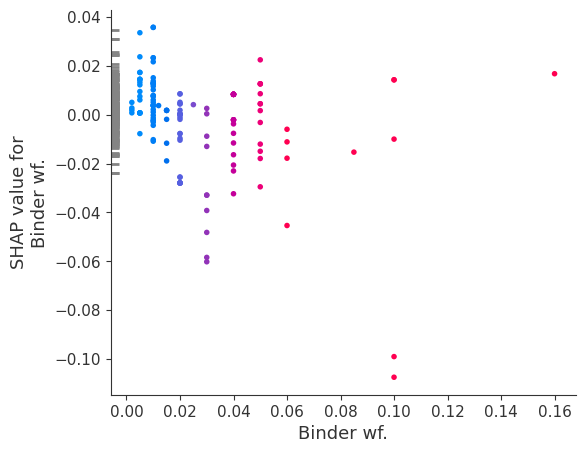

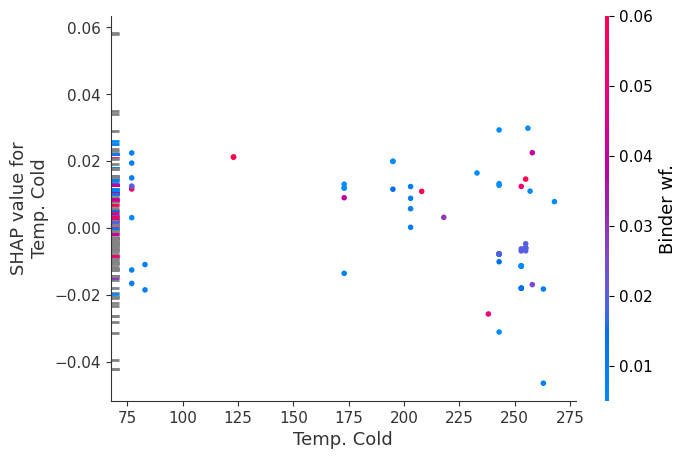

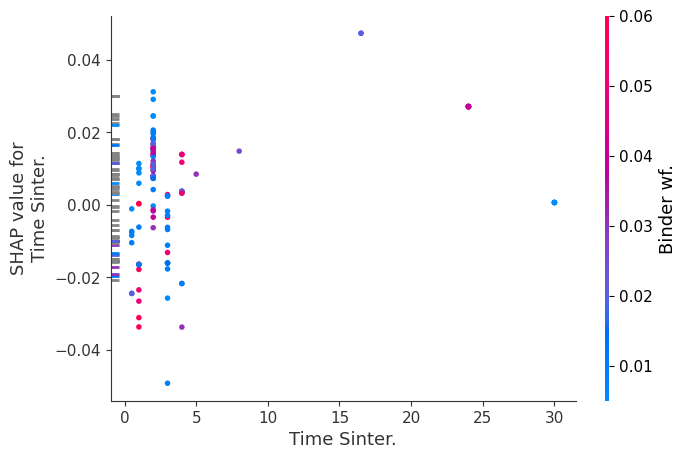

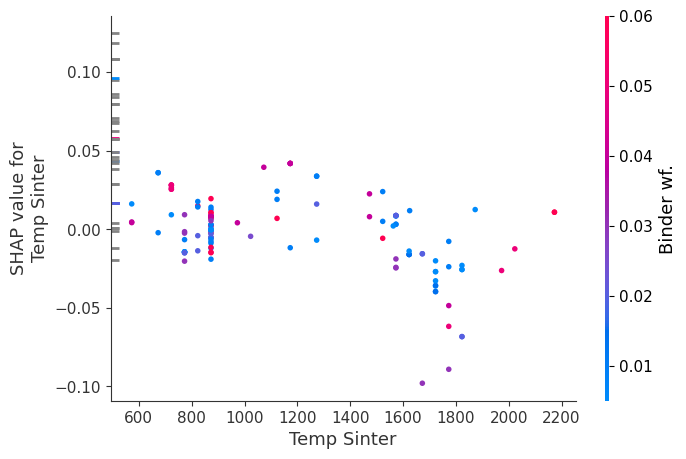

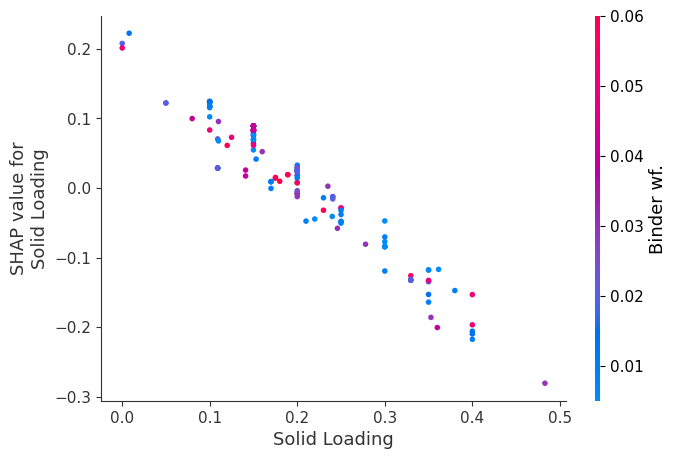

First Sample Solid Name_Al2O3                0.0000
Solid Name_HAP                  1.0000
Solid Name_Mullite              0.0000
Solid Name_SiO2                 0.0000
Solid Name_YSZ                  0.0000
Solid Name_infrequent           0.0000
Fluid Name_TBA                  0.0000
Fluid Name_camphene             0.0000
Fluid Name_water                1.0000
Fluid Name_infrequent           0.0000
Material_group_Ceramic          1.0000
Material_group_Metal            0.0000
Material_group_Polymer          0.0000
Material_group_infrequent       0.0000
Disp. wf.                       0.0150
Binder wf.                         NaN
Temp. Cold                         NaN
Time Sinter.                    4.0000
Temp Sinter                  1373.0000
Solid Loading                   0.2671
Name: 0, dtype: float64
First sample prediction: 0.636647636823618


<Figure size 640x480 with 0 Axes>

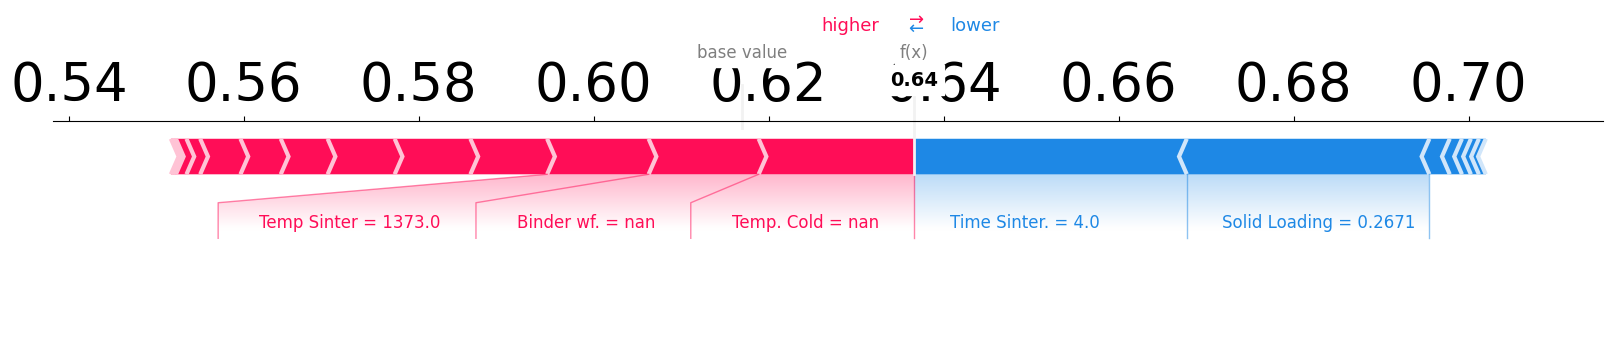

<Figure size 640x480 with 0 Axes>

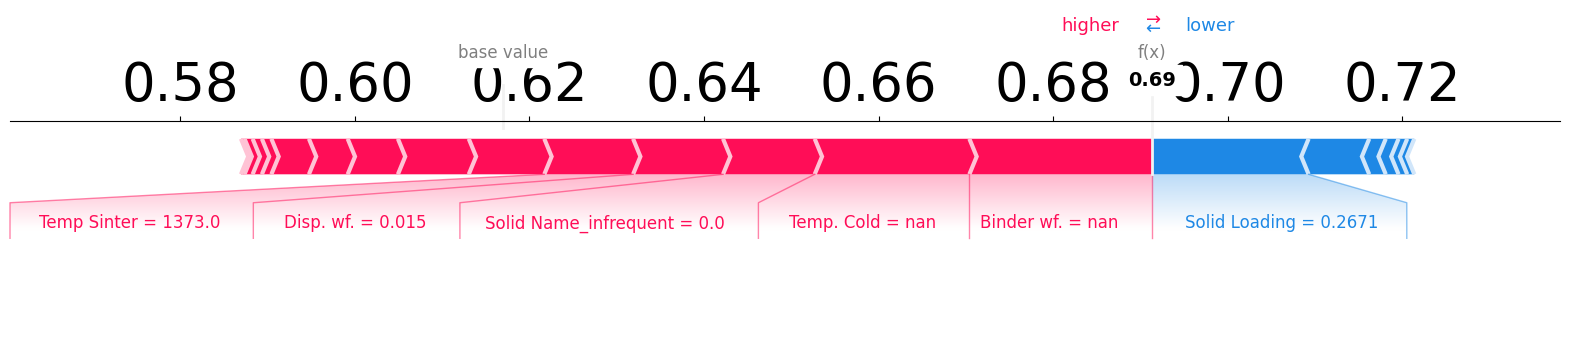

Finished


In [3]:
%matplotlib inline
import importlib
import train_pipeline
importlib.reload(train_pipeline)
model_name = "catb_onehot[selected]"
results[model_name] = train_pipeline.train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=1)

## Catb + onehot + impute

In [4]:
model_name = "catb_onehot_impute"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=shap_opt)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: catb_onehot_impute
----------------------------------------
Selected model: catb_onehot_impute
Search space: [{'model__n_estimators': [250, 500, 1000], 'model__depth': [8], 'model__eval_metric': ['MAE']}]
Fitting Grid...
CV Results
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__depth param_model__eval_metric  param_model__n_estimators                                             params  split0_te

## XGB + onehot

In [5]:
model_name = "xgb_onehot"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=shap_opt)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: xgb_onehot
----------------------------------------
Selected model: xgb_onehot
Search space: [{'model__n_estimators': [50, 100, 250, 500, 1000], 'model__max_depth': [3, 5, 8]}]
Fitting Grid...
CV Results
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__max_depth  param_model__n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  

## XGB + impute

In [6]:
model_name = "xgb_onehot_impute"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=shap_opt)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: xgb_onehot_impute
----------------------------------------
Selected model: xgb_onehot_impute
Search space: [{'model__n_estimators': [50, 100, 250, 500, 1000], 'model__max_depth': [3, 5, 8]}]
Fitting Grid...
CV Results
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__max_depth  param_model__n_estimators                                             params  split0_test_score  split1_test_score  split

## Random Forest

In [7]:
model_name = "rf"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=shap_opt)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: rf
----------------------------------------
Selected model: rf
Search space: [{'model__n_estimators': [50, 100, 200], 'model__max_features': ['log2', 'sqrt', None], 'model__max_depth': [10, 20, 40]}]
Fitting Grid...
CV Results
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_model__max_depth param_model__max_features  param_model__n_estimators                                             params  split0_t

## LR

In [8]:
import train_pipeline
import importlib
importlib.reload(train_pipeline)
model_name = "lr"
results[model_name] = train_pipeline.train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=0)

Parsing data...
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
Model selected: lr
----------------------------------------
Selected model: lr
Search space: [{}]
Fitting Grid...
CV Results
    mean_fit_time  std_fit_time  mean_score_time  std_score_time params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.025959        0.0191         0.007213        0.000183     {}           0.417892           0.43

## LR  (solid loading only)

In [9]:
model_name = "lr_solidloading"
results[model_name] = train_model(model_name=model_name, feats_name="reduced_feats", shap_opt=0)


Parsing data...
Using only Solid Loading feature for lr_solidloading model
Material in test but has less than 5 occurrences in train:
Unique materials in test with less than 5 occurrences in train:
name_part1
NiTiNbO            4
Ni                 3
CaSiO3             3
polysiloxane       3
Si                 2
fireclay           2
Zeo                2
LSCF               1
BT                 1
theophylline       1
Ca3ZrSi2O9         1
stainless steel    1
CuO                1
PU                 1
AlN                1
Merwinite          1
Cr2O3              1
CaP                1
Name: count, dtype: int64
lr_solidloading selected. Removing other features except Solid Loading
Model selected: lr_solidloading
----------------------------------------
Selected model: lr_solidloading
Search space: [{}]
Fitting Grid...
CV Results
    mean_fit_time  std_fit_time  mean_score_time  std_score_time params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_scor

## ALL metrics

In [10]:
print_nested_keys(results)

catb_onehot[selected]
catb_onehot[selected].overall_metrics
catb_onehot[selected].no_nan_metrics
catb_onehot[selected].only_nans_metrics
catb_onehot[selected].group_metrics
catb_onehot[selected].group_metrics.material_group
catb_onehot[selected].group_metrics.material_group.topn
catb_onehot[selected].group_metrics.material_group.all
catb_onehot[selected].group_metrics.name_part1
catb_onehot[selected].group_metrics.name_part1.topn
catb_onehot[selected].group_metrics.name_part1.all
catb_onehot[selected].group_metrics.name_fluid1
catb_onehot[selected].group_metrics.name_fluid1.topn
catb_onehot[selected].group_metrics.name_fluid1.all
catb_onehot[selected].group_metrics.name_part1_novel_in_test
catb_onehot[selected].group_metrics.name_part1_novel_in_test.topn
catb_onehot[selected].group_metrics.name_part1_novel_in_test.all
catb_onehot[selected].group_metrics.name_part1_freq_bin
catb_onehot[selected].group_metrics.name_part1_freq_bin.topn
catb_onehot[selected].group_metrics.name_part1_freq_b

In [11]:
print_nested_keys_and_values(results)

catb_onehot[selected].overall_metrics:
                pipeline train_r2 train_mae train_mse train_mape test_r2 test_mae test_mse test_mape
0  catb_onehot[selected]     0.92     0.035     0.004      9.793    0.81    0.059    0.008    14.969

catb_onehot[selected].no_nan_metrics:
                pipeline  count no_nan_r2 no_nan_mae no_nan_mse no_nan_mape
0  catb_onehot[selected]     27      0.39      0.077      0.014      15.718

catb_onehot[selected].only_nans_metrics:
                pipeline  count only_nans_r2 only_nans_mae only_nans_mse only_nans_mape
0  catb_onehot[selected]    345         0.83         0.057         0.007         14.910

catb_onehot[selected].group_metrics.material_group.topn:
    material_group train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0          Ceramic     0.90     0.036     0.004     10.058         1276    0.79    0.058    0.007    13.042         311
1          Polymer     0.94     0.023     0.001     

## Overall Results

In [12]:
dfs = []
for model, data in results.items():
    if 'overall_metrics' in data:
        df = data['overall_metrics'].copy()
        df['model'] = model
        dfs.append(df)

sorted_metrics = pd.concat(dfs, ignore_index=True).sort_values(by='test_r2', ascending=False)
print(sorted_metrics)

                pipeline train_r2 train_mae train_mse train_mape test_r2 test_mae test_mse test_mape                  model
0  catb_onehot[selected]     0.92     0.035     0.004      9.793    0.81    0.059    0.008    14.969  catb_onehot[selected]
1     catb_onehot_impute     0.91     0.036     0.004      9.856    0.81    0.060    0.008    14.625     catb_onehot_impute
2             xgb_onehot     0.91     0.036     0.004     10.263    0.79    0.064    0.009    16.292             xgb_onehot
4                     rf     0.91     0.035     0.004     11.674    0.78    0.063    0.009    17.745                     rf
3      xgb_onehot_impute     0.91     0.036     0.004     10.027    0.76    0.063    0.010    14.536      xgb_onehot_impute
5                     lr     0.43     0.118     0.024     42.504    0.35    0.130    0.027    42.214                     lr
6        lr_solidloading     0.35     0.126     0.027     44.251    0.28    0.135    0.030    46.053        lr_solidloading


## By Material Group

In [13]:
print_nested_keys_and_values(results, filter_key="group_metrics.material_group.all")

catb_onehot[selected].group_metrics.material_group.all:
    material_group train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0          Ceramic     0.90     0.036     0.004     10.058         1276    0.79    0.058    0.007    13.042         311
1  Ceramic/Polymer     0.88     0.035     0.005      9.107           36    0.92    0.035    0.004    12.881           9
2            Metal     0.95     0.032     0.002      7.777           66    0.83    0.056    0.009    15.082          24
3    Metal/Ceramic     0.96     0.022     0.001     22.432           27    0.65    0.123    0.025    73.003          13
4   Pharmaceutical     0.77     0.017     0.000      3.768            5     nan    0.016    0.000     3.492           1
5          Polymer     0.94     0.023     0.001      3.416           77    0.80    0.044    0.003     5.848          14

catb_onehot_impute.group_metrics.material_group.all:
    material_group train_r2 train_mae train_mse tr

## By Year

In [14]:
print_nested_keys_and_values(results, filter_key="catb_onehot[selected].group_metrics.year.all")

catb_onehot[selected].group_metrics.year.all:
      year train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0   2001.0     0.96     0.023     0.001     24.588           26    0.84    0.040    0.002     9.575           4
1   2002.0     0.94     0.012     0.000      1.991            9   -0.08    0.073    0.011    15.462           4
2   2004.0     0.94     0.052     0.004    106.465           19    0.79    0.078    0.009    26.113           4
3   2005.0     0.82     0.056     0.007     21.051           15    0.90    0.074    0.008    17.510           3
4   2006.0     0.99     0.017     0.000      8.033           28    0.95    0.049    0.003    28.498           4
5   2007.0     0.97     0.028     0.002     12.498           75    0.94    0.052    0.005    15.451          20
6   2008.0     0.97     0.018     0.001      3.508           88    0.80    0.054    0.007    25.514          18
7   2009.0     0.93     0.028     0.002      8.376        

## By novel materials

In [15]:
filter_key = "catb_onehot[selected].group_metrics.name_part1_novel_in_test.all"
print_nested_keys_and_values(results, filter_key=filter_key)


catb_onehot[selected].group_metrics.name_part1_novel_in_test.all:
   name_part1_novel_in_test train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0                     False     0.91     0.036     0.004      9.896         1443    0.82    0.057    0.007    14.976         342
1                      True     0.98     0.024     0.001      6.429           44    0.60    0.079    0.014    14.886          30



In [16]:
filter_key = "catb_onehot_impute.group_metrics.name_part1_novel_in_test.all"
print_nested_keys_and_values(results, filter_key=filter_key)


catb_onehot_impute.group_metrics.name_part1_novel_in_test.all:
   name_part1_novel_in_test train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0                     False     0.91     0.036     0.004      9.884         1443    0.82    0.058    0.008    14.533         342
1                      True     0.98     0.025     0.001      8.909           44    0.60    0.081    0.014    15.670          30



In [17]:
for model_key in results:
    filter_key = f"{model_key}.group_metrics.name_part1_novel_in_test.all"
    print(f"\nModel: {model_key}")
    print_nested_keys_and_values(results, filter_key=filter_key)



Model: catb_onehot[selected]
catb_onehot[selected].group_metrics.name_part1_novel_in_test.all:
   name_part1_novel_in_test train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0                     False     0.91     0.036     0.004      9.896         1443    0.82    0.057    0.007    14.976         342
1                      True     0.98     0.024     0.001      6.429           44    0.60    0.079    0.014    14.886          30


Model: catb_onehot_impute
catb_onehot_impute.group_metrics.name_part1_novel_in_test.all:
   name_part1_novel_in_test train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0                     False     0.91     0.036     0.004      9.884         1443    0.82    0.058    0.008    14.533         342
1                      True     0.98     0.025     0.001      8.909           44    0.60    0.081    0.014    15.670          30


Model: xgb_onehot
xgb_onehot.group_me

## By novel material frequency in train

In [18]:
filter_key = "catb_onehot[selected].group_metrics.name_part1_freq_bin.all"
print_nested_keys_and_values(results, filter_key=filter_key)


catb_onehot[selected].group_metrics.name_part1_freq_bin.all:
  name_part1_freq_bin train_r2 train_mae train_mse train_mape  train_count test_r2 test_mae test_mse test_mape  test_count
0                  10     0.95     0.031     0.002      5.473           73    0.65    0.069    0.010    13.165          32
1                 200     0.86     0.037     0.004      9.502          359    0.85    0.051    0.005    11.898          77
2                200+     0.92     0.037     0.004     11.783          643    0.80    0.059    0.008    14.465         166
3                   5     0.98     0.021     0.001      5.034           79    0.84    0.053    0.006    11.197          26
4                  50     0.92     0.034     0.004      8.342          333    0.89    0.051    0.006    20.643          67
5                Rare     None      None      None       None            0  -11.93    0.252    0.063    38.863           4



In [19]:
dfs = []
for model, data in results.items():
    if 'overall_metrics' in data:
        if model == 'lr' or model == 'lr_solidloading':
            continue
        df = data['group_metrics']['name_part1_freq_bin']['all'].copy()
        df['model'] = model
        dfs.append(df)

sorted_metrics = pd.concat(dfs, ignore_index=True).sort_values(by='test_r2', ascending=False)
sorted_metrics[['model', 'name_part1_freq_bin', 'train_count','test_count', 'test_r2', 'test_mae']]

model name_part1_freq_bin  train_count  test_count test_r2 test_mae
4   catb_onehot[selected]                  50          333          67    0.89    0.051
10     catb_onehot_impute                  50          333          67    0.88    0.052
22      xgb_onehot_impute                  50          333          67    0.88    0.051
16             xgb_onehot                  50          333          67    0.87    0.057
28                     rf                  50          333          67    0.86    0.058
1   catb_onehot[selected]                 200          359          77    0.85    0.051
7      catb_onehot_impute                 200          359          77    0.85    0.051
13             xgb_onehot                 200          359          77    0.84    0.052
3   catb_onehot[selected]                   5           79          26    0.84    0.053
9      catb_onehot_impute                   5           79          26    0.83    0.056
25                     rf                 200          359          77    0.82    0.054
19      xgb_onehot_impute                 200          359          77    0.82    0.056
27                     rf                   5           79          26    0.81    0.061
21      xgb_onehot_impute                   5           79          26    0.80    0.061
2   catb_onehot[selected]                200+          643         166    0.80    0.059
8      catb_onehot_impute                200+          643         166    0.79    0.061
20      xgb_onehot_impute                200+          643         166    0.77    0.063
26                     rf                200+          643         166    0.77    0.063
18      xgb_onehot_impute                  10           73          32    0.76    0.057
14             xgb_onehot                200+          643         166    0.76    0.066
15             xgb_onehot                   5           79          26    0.76    0.074
12             xgb_onehot                  10           73          32    0.71    0.069
0   catb_onehot[selected]                  10           73          32    0.65    0.069
6      catb_onehot_impute                  10           73          32    0.65    0.071
24                     rf                  10           73          32    0.63    0.069
23      xgb_onehot_impute                Rare            0           4  -46.21    0.480
29                     rf                Rare            0           4  -14.71    0.277
17             xgb_onehot                Rare            0           4  -12.68    0.254
5   catb_onehot[selected]                Rare            0           4  -11.93    0.252
11     catb_onehot_impute                Rare            0           4  -11.10    0.242

## By Additional recent paper materials

In [20]:
filter_key = "catb_onehot[selected].additional_metrics.title"
print_nested_keys_and_values(results, filter_key=filter_key)


catb_onehot[selected].additional_metrics.title:
                                                   count       r2    mae    mse    mape
Bone-like structure by modified freeze casting         2   -30.69  0.182  0.033  31.798
Design of porous aluminum oxide ceramics using ...     3   -22.49  0.153  0.025  20.978
Dual-Scale Porosity Alumina Structures Using Ce...     2    -0.20  0.129  0.020  20.780
Freeze casting of hydroxyapatite-titania compos...     4  -255.92  0.156  0.025  29.170
The Production of Porous Hydroxyapatite Scaffol...     6     0.77  0.067  0.012  47.391



In [21]:
filter_key = "catb_onehot_impute.additional_metrics"
print_nested_keys_and_values(results, filter_key=filter_key)


##